## 1. Business Understanding

1. This project comes from a lending company
2. Objective: to build a model that can predict credit risk using a dataset provided by the company consisting of accepted and rejected loan data.
3. create visual media presenting solutions to client with PPT

## 2. Analytic Approach

The problem given by the lending company is the risk of lending credit. the lending company wants to create a model that can predict credit risk to predict customers can borrow or be rejected. the analysis approach taken is a 'predictive model'.

## 3. Data Requirements

The data required is the accepted and rejected loan data and the authorization of each data feature. 

## 4. Data Collection

##### Import Library

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [137]:
df = pd.read_csv('loan_data_2007_2014.csv', low_memory=False)
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 5. Data Understanding

In [138]:
df.shape

(464970, 75)

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464970 entries, 0 to 464969
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   464970 non-null  int64  
 1   id                           464970 non-null  int64  
 2   member_id                    464970 non-null  int64  
 3   loan_amnt                    464970 non-null  int64  
 4   funded_amnt                  464970 non-null  object 
 5   funded_amnt_inv              464970 non-null  object 
 6   term                         464970 non-null  object 
 7   int_rate                     464969 non-null  float64
 8   installment                  464970 non-null  float64
 9   grade                        464970 non-null  object 
 10  sub_grade                    464969 non-null  object 
 11  emp_title                    437465 non-null  object 
 12  emp_length                   444013 non-null  object 
 13 

In [140]:
df.drop(columns='Unnamed: 0', inplace=True)
df.columns, df.shape

(Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
        'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
        'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
        'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
        'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
        'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
        'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
        'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
        'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
        'total_rec_int', 'total_rec_late_fee', 'recoveries',
        'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
        'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
        'mths_since_last_major_derog', 'policy_code', 'application_type',
        'annual_inc_joint', 'dti_joint', 'verification_statu

In [141]:
# investigate target column
df1 = df.copy()
df1.loan_status.unique()


array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', nan],
      dtype=object)

In [142]:
# 
df1['target'] = np.where(df1.loc[:, 'loan_status'].isin(['Charged Off', 
                                                         'Default',  
                                                         'Late (31-120 days)', 
                                                         'Late (16-30 days)', 
                                                         'Does not meet the credit policy. Status:Charged Off'])
                                                         , 1, 0)

<h4><p><b>at this stage we divide the target into two, namely good debt = 1 and bad debt = 0 based on the loan status.</b></p></h>

<h5><p><b>good borrowers:</b>
<p>-Fully Paid
<p>-Current
<p>-In Grace Period
<p>Does not meet the credit policy. Status:Fully Paid</p>

<p><b>bad borrowers:</b>
<p>-Charged Off
<p>-Default
<p>-Late (31-120 days)
<p>-Late (16-30 days)
<p>-Does not meet the credit policy. Status:Charged Off</p></h>

In [143]:
df1.target.value_counts()

0    412908
1     52062
Name: target, dtype: int64

In [144]:
df1.groupby('target').agg({'funded_amnt':'sum', 'total_pymnt':'sum'}).reset_index()

,target,funded_amnt,total_pymnt
0,0,5000240010000300050007000300065001200030001000...,4.998278e+09
1,1,2500560053759000100002100060001500050005000150...,3.656674e+08


The data above shows that the company suffered a loss from bad debt of $760916150

In [145]:
# Counts the number of null values in each column of the frame data and sort based on null count
df_drop = df1.isnull().sum().sort_values()
# get data from df1
df_drop = df_drop[df_drop == df1.shape[0]]
# drop null based on index
df_drop = list(df_drop.index)
print(df_drop)

['annual_inc_joint', 'total_cu_tl', 'inq_fi', 'all_util', 'max_bal_bc', 'open_rv_24m', 'open_rv_12m', 'mths_since_rcnt_il', 'total_bal_il', 'open_il_24m', 'open_il_12m', 'open_il_6m', 'open_acc_6m', 'verification_status_joint', 'dti_joint', 'il_util', 'inq_last_12m']


#### Drop null feature columns

In [146]:
df1.drop(columns=df_drop, inplace=True)
print(f"Data dimension before drop: {df.shape}")
print(f"Data dimension after drop: {df1.shape}")

Data dimension before drop: (464970, 74)
Data dimension after drop: (464970, 58)


### Summary of Statistic Descriptive for Categorical and Numerical Feature

##### Separating numerical and categorical features

In [147]:
# create an empty list 
numeric = []
categorical = []

for i in df1.columns:
    if df1[i].dtype == 'object':
        categorical.append(i)
    else:
        numeric.append(i)
print(f"The amount of numerical feature is: {len(numeric)}")
print(f"The amount of categorical feature is: {len(categorical)}")

The amount of numerical feature is: 34
The amount of categorical feature is: 24


#### Summary of Statistic Descriptive for numercal features

In [148]:
df1[numeric].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,464970.0,1.309108e+07,1.090698e+07,54734.00,3636524.50,1.011694e+07,2.074230e+07,3.809811e+07
member_id,464970.0,1.460918e+07,1.169656e+07,70473.00,4371763.25,1.194994e+07,2.301219e+07,4.086083e+07
loan_amnt,464970.0,1.431553e+04,8.286103e+03,130.00,8000.00,1.200000e+04,2.000000e+04,3.500000e+04
int_rate,464969.0,1.382795e+01,4.356569e+00,5.42,10.99,1.366000e+01,1.649000e+01,2.606000e+01
installment,464970.0,4.319761e+02,2.434333e+02,1.00,256.64,3.798100e+02,5.664400e+02,1.409990e+03
annual_inc,464966.0,7.327214e+04,5.497333e+04,0.00,45000.00,6.300000e+04,8.890000e+04,7.500000e+06
dti,464969.0,1.721926e+01,7.851894e+00,0.00,11.36,1.687000e+01,2.278000e+01,3.999000e+01
delinq_2yrs,464940.0,2.847894e-01,7.977655e-01,0.00,0.00,0.000000e+00,0.000000e+00,2.900000e+01
inq_last_6mths,464940.0,8.046608e-01,1.091690e+00,0.00,0.00,0.000000e+00,1.000000e+00,3.300000e+01
mths_since_last_delinq,215360.0,3.410543e+01,2.178012e+01,0.00,16.00,3.100000e+01,4.900000e+01,1.880000e+02


In [149]:
# investigate numerical column
df1[numeric]['policy_code'].unique()

array([ 1., nan])

In [150]:
# drop columns that are not useful for model
df1.drop(columns=['policy_code', 'id', 'member_id'], inplace=True)

In [151]:
print(f"Data dimension after drop: {df1.shape}")

Data dimension after drop: (464970, 55)


#### Summary of Statistic Descriptive for categorical features

In [152]:
df1[categorical].describe().transpose()

,count,unique,top,freq
funded_amnt,464970,1355,10000,32827
funded_amnt_inv,464970,9855,10000.0,28585
term,464970,3,36 months,336971
grade,464970,8,B,136491
sub_grade,464969,35,B3,31584
emp_title,437465,205150,Teacher,5365
emp_length,444013,11,10+ years,149605
home_ownership,464970,7,MORTGAGE,235187
verification_status,464970,4,Verified,167464
issue_d,464969,91,Oct-14,38782


In [153]:
# drop columns that are not useful for model
df1.drop(columns=['application_type', 'url', 'desc', 
                  'title', 'addr_state', 'zip_code', 'emp_title'], 
                  inplace=True)

In [154]:
print(f"Data dimension after drop: {df1.shape}")

Data dimension after drop: (464970, 48)


## 🔍 Exploratory Data Analysis

#### Univariate Analysis: Numerical Features
1. Summary statistics 

In [155]:
df_an = df1.copy()

In [156]:
df_an["funded_amnt"].value_counts()

10000    32827
12000    25356
15000    23298
20000    22487
35000    16397
         ...  
34325        1
34075        1
34600        1
33400        1
925          1
Name: funded_amnt, Length: 1355, dtype: int64

In [157]:
df_an["funded_amnt_inv"].value_counts()

10000.0        28585
12000.0        21670
15000.0        19412
20000.0        18000
8000.0         13197
               ...  
5377.265614        1
13274.51261        1
9418.065777        1
6493.646238        1
23750.23552        1
Name: funded_amnt_inv, Length: 9855, dtype: int64

In [158]:
# create a new empty list 
numeric1 = []
categorical1 = []

for i in df_an.columns:
    if df_an[i].dtype == 'object':
        categorical1.append(i)
    else:
        numeric1.append(i)

In [159]:
df_an[numeric1].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,464970.0,14315.529131,8286.102510,130.00,8000.00,12000.000000,20000.00000,3.500000e+04
int_rate,464969.0,13.827953,4.356569,5.42,10.99,13.660000,16.49000,2.606000e+01
installment,464970.0,431.976104,243.433328,1.00,256.64,379.810000,566.44000,1.409990e+03
annual_inc,464966.0,73272.136296,54973.331135,0.00,45000.00,63000.000000,88900.00000,7.500000e+06
dti,464969.0,17.219256,7.851894,0.00,11.36,16.870000,22.78000,3.999000e+01
delinq_2yrs,464940.0,0.284789,0.797765,0.00,0.00,0.000000,0.00000,2.900000e+01
inq_last_6mths,464940.0,0.804661,1.091690,0.00,0.00,0.000000,1.00000,3.300000e+01
mths_since_last_delinq,215360.0,34.105433,21.780121,0.00,16.00,31.000000,49.00000,1.880000e+02
mths_since_last_record,62463.0,74.278709,30.357361,0.00,53.00,76.000000,102.00000,1.290000e+02
open_acc,464940.0,11.186463,4.987993,0.00,8.00,10.000000,14.00000,8.400000e+01


2. Chart analysis

In [160]:
print(numeric1)

['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'target']


In [161]:
num = ['funded_amnt','funded_amnt_inv', 'loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 
       'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'acc_now_delinq', 
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']

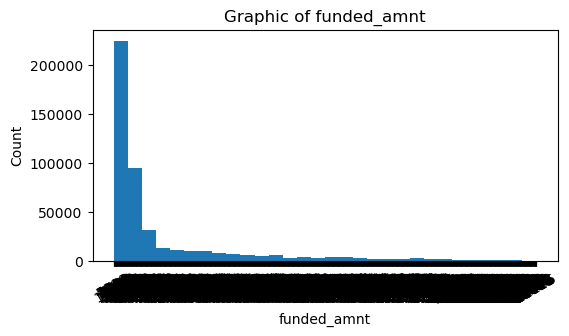

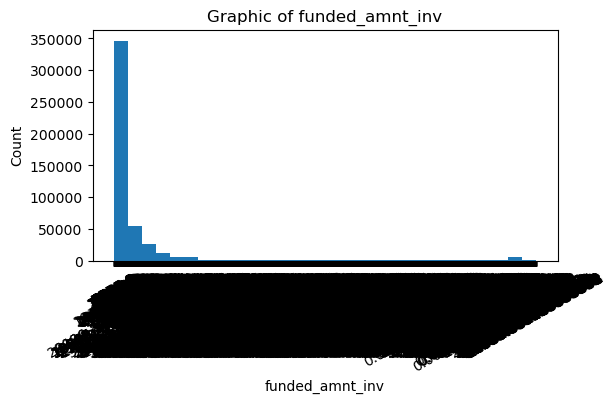

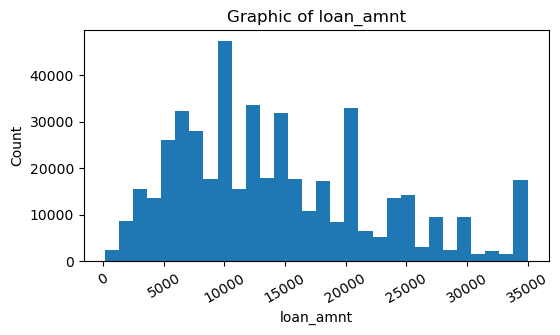

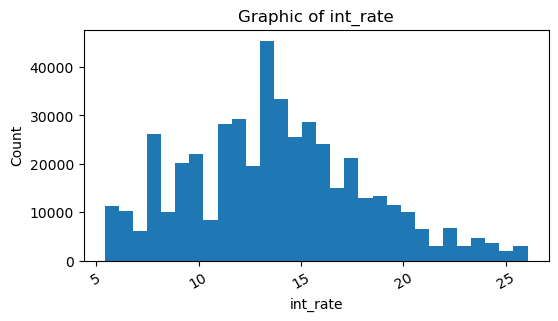

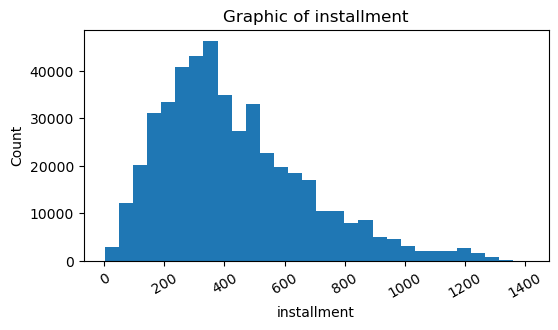

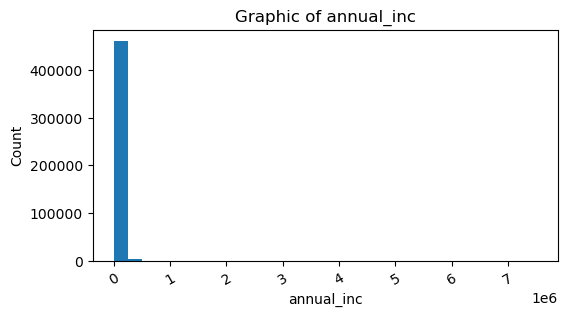

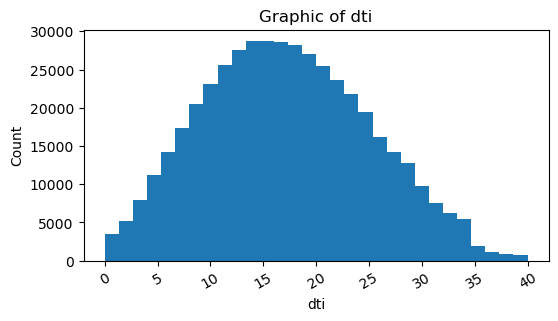

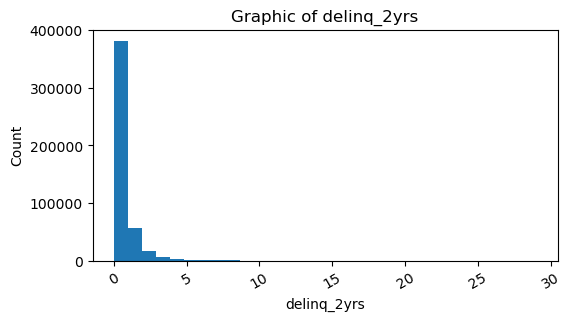

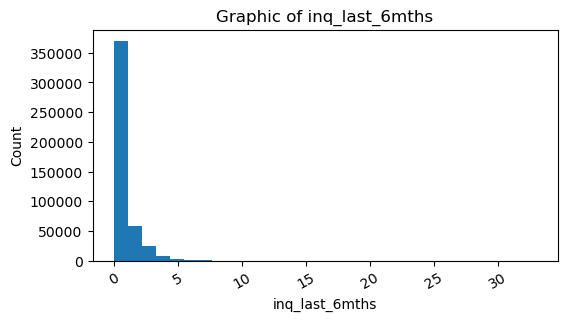

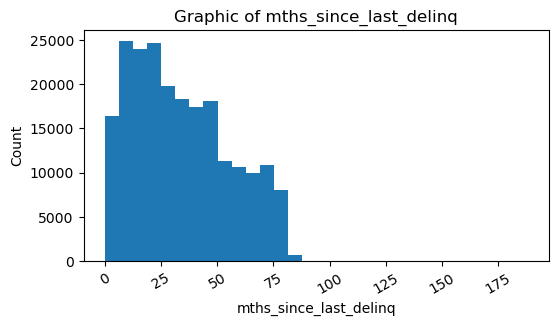

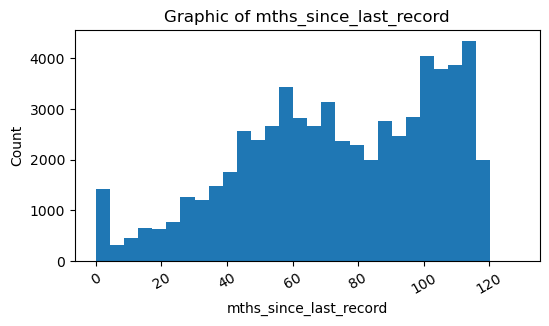

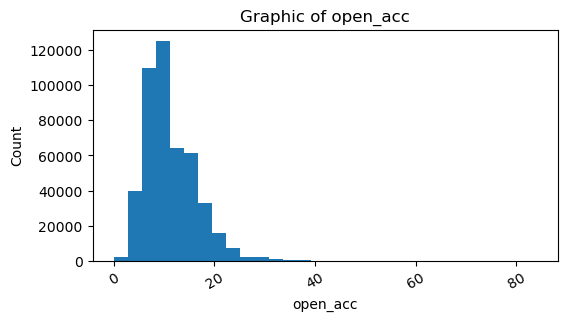

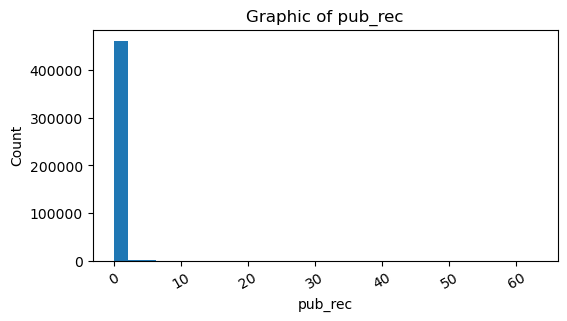

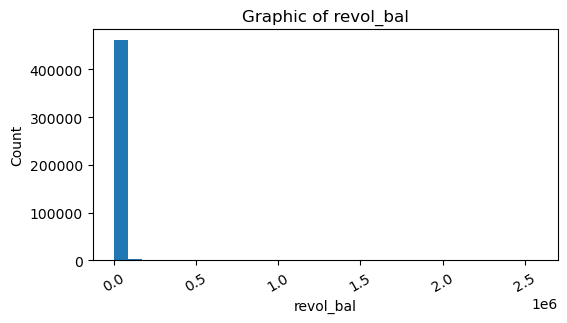

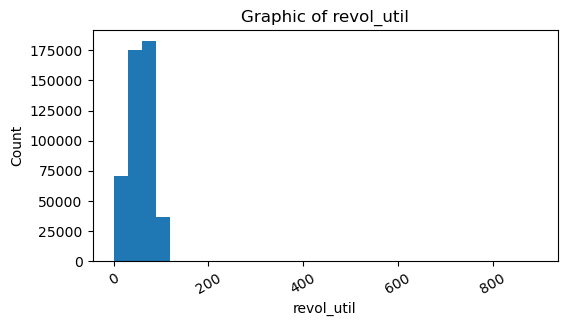

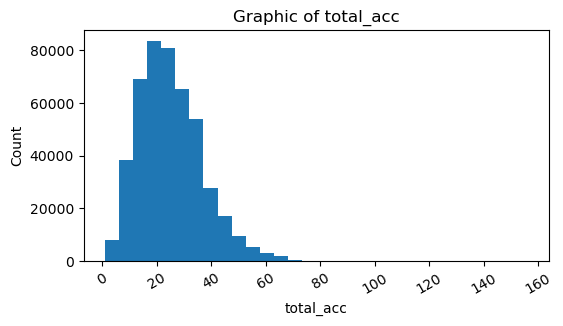

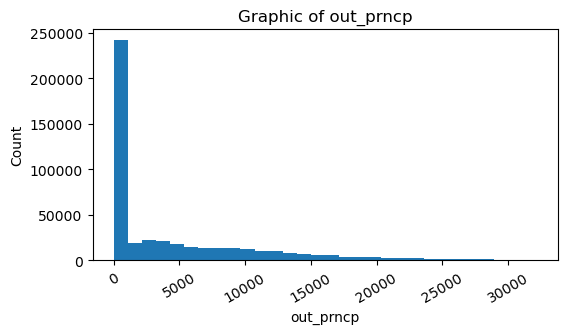

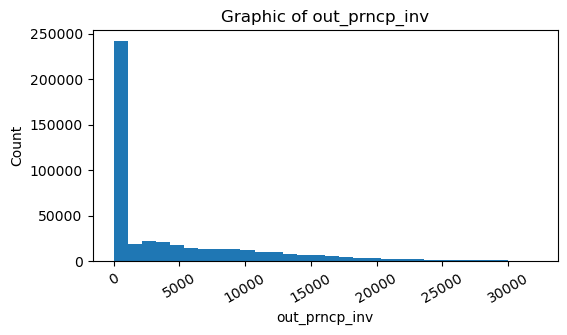

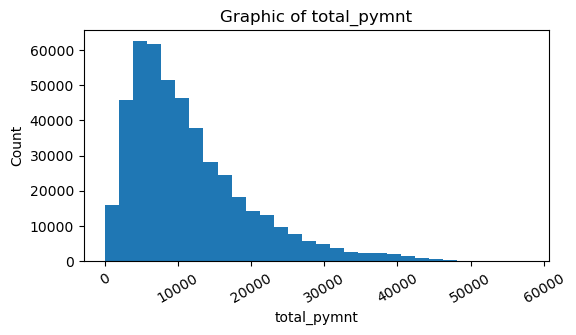

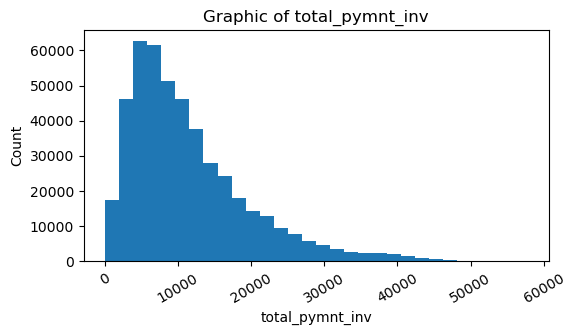

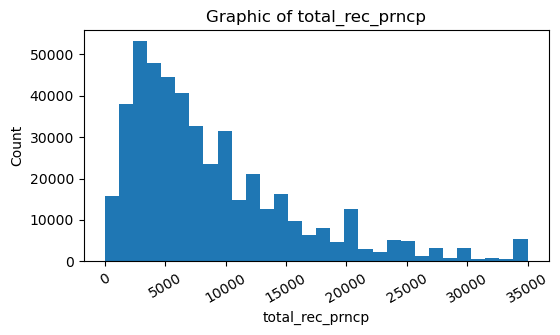

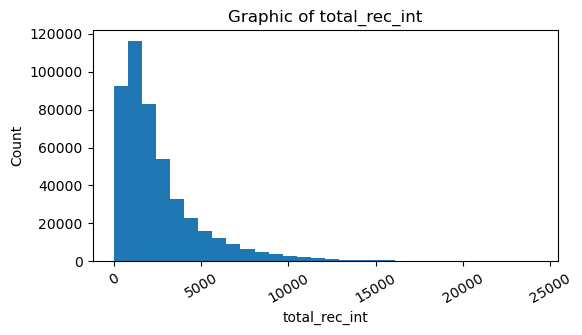

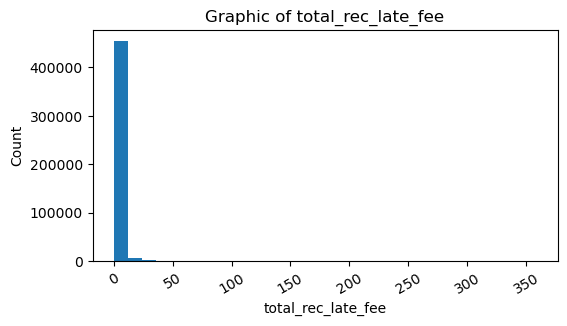

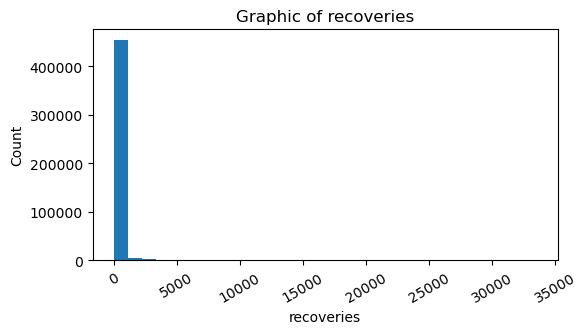

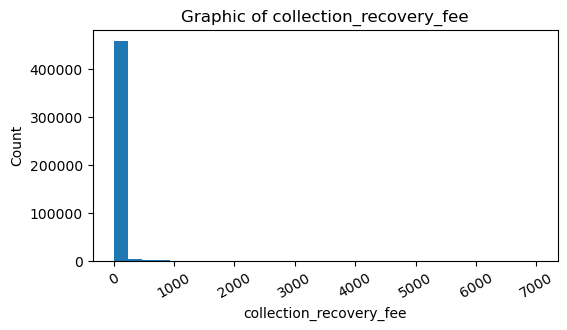

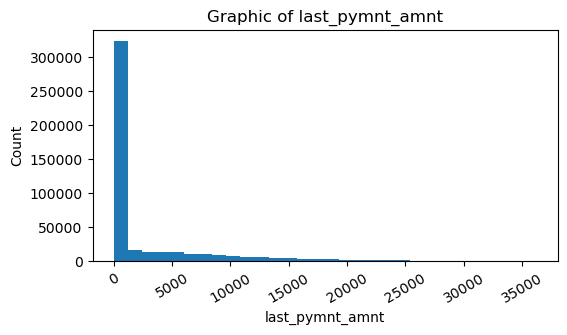

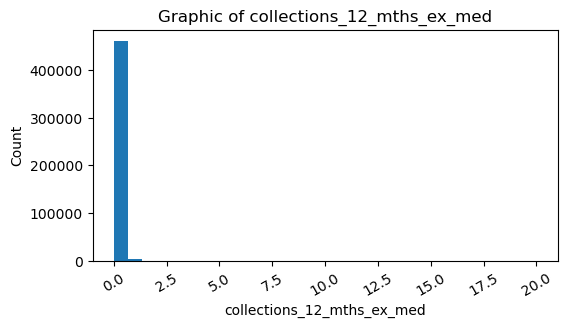

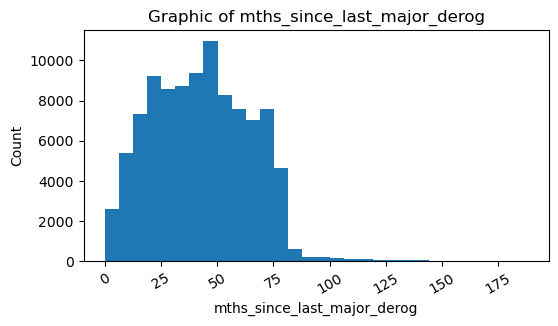

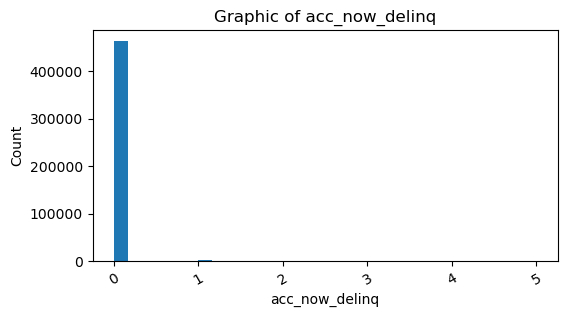

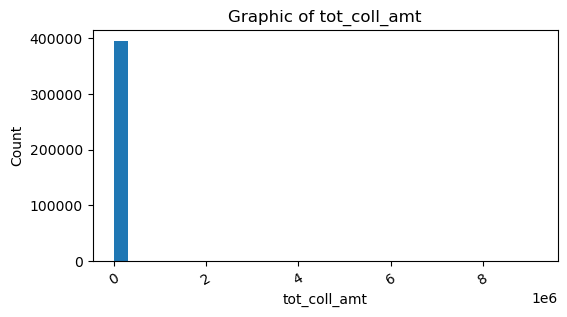

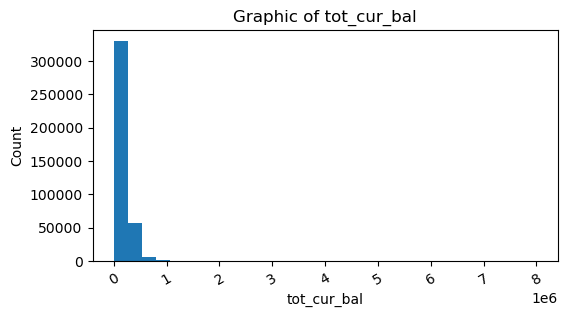

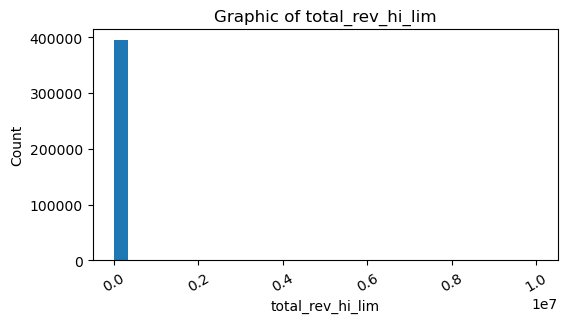

In [162]:
def plot_hist(variable):
    plt.figure(figsize=(6,3))
    plt.hist(df_an[variable], bins = 30)
    plt.xlabel(variable)
    plt.ylabel("Count")
    plt.title(f"Graphic of {variable}")
    plt.xticks(rotation = 30)
    plt.show()

for i in num:
    plot_hist(i) 

In [163]:
df_an[categorical1].describe().transpose()

,count,unique,top,freq
funded_amnt,464970,1355,10000,32827
funded_amnt_inv,464970,9855,10000.0,28585
term,464970,3,36 months,336971
grade,464970,8,B,136491
sub_grade,464969,35,B3,31584
emp_length,444013,11,10+ years,149605
home_ownership,464970,7,MORTGAGE,235187
verification_status,464970,4,Verified,167464
issue_d,464969,91,Oct-14,38782
loan_status,464969,9,Current,223554


#### Univariate Analysis: Categorical Features

Feature engineering for Date analysis

In [164]:
date = []
for i in categorical1:
    if df_an[i].nunique() > 35:
        date.append(i)
print(date)

['funded_amnt', 'funded_amnt_inv', 'issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']


In [165]:
df_date = df_an[date]
df_date.head()

,funded_amnt,funded_amnt_inv,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
0,5000,4975.0,Dec-11,Jan-85,Jan-15,NaN,Jan-16
1,2500,2500.0,Dec-11,Apr-99,Apr-13,NaN,Sep-13
2,2400,2400.0,Dec-11,Nov-01,Jun-14,NaN,Jan-16
3,10000,10000.0,Dec-11,Feb-96,Jan-15,NaN,Jan-15
4,3000,3000.0,Dec-11,Jan-96,Jan-16,Feb-16,Jan-16


In [166]:
df_date = df_date.drop(['funded_amnt', 'funded_amnt_inv'], axis=1)
df_date.head()

,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
0,Dec-11,Jan-85,Jan-15,NaN,Jan-16
1,Dec-11,Apr-99,Apr-13,NaN,Sep-13
2,Dec-11,Nov-01,Jun-14,NaN,Jan-16
3,Dec-11,Feb-96,Jan-15,NaN,Jan-15
4,Dec-11,Jan-96,Jan-16,Feb-16,Jan-16


Separate month and year features

In [167]:
df_date['issue_d_month'] = df_date.issue_d.str[:3]
df_date['issue_d_year'] = np.where(df_date.issue_d.str[4:].astype('float64')>20,'19'+ df_date.issue_d.str[4:],'20'+ df_date.issue_d.str[4:])

df_date['earliest_cr_line_month'] = df_date.earliest_cr_line.str[:3]
df_date['earliest_cr_line_year'] = np.where(df_date.earliest_cr_line.str[4:].astype('float64')>20,'19'+ df_date.earliest_cr_line.str[4:],'20'+ df_date.earliest_cr_line.str[4:])

df_date['last_pymnt_d_month'] = df_date.last_pymnt_d.str[:3]
df_date['last_pymnt_d_year'] = np.where(df_date.last_pymnt_d.str[4:].astype('float64')>20,'19'+ df_date.last_pymnt_d.str[4:],'20'+ df_date.last_pymnt_d.str[4:])

df_date['next_pymnt_d_month'] = df_date.next_pymnt_d.str[:3]
df_date['next_pymnt_d_year'] = np.where(df_date.next_pymnt_d.str[4:].astype('float64')>20,'19'+ df_date.next_pymnt_d.str[4:],'20'+ df_date.next_pymnt_d.str[4:])

df_date['last_credit_pull_d_month'] = df_date.last_credit_pull_d.str[:3]
df_date['last_credit_pull_d_year'] = np.where(df_date.last_credit_pull_d.str[4:].astype('float64')>20,'19'+ df_date.last_credit_pull_d.str[4:],'20'+ df_date.last_credit_pull_d.str[4:])

In [168]:
df_date.head()

,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,last_pymnt_d_month,last_pymnt_d_year,next_pymnt_d_month,next_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year
0,Dec-11,Jan-85,Jan-15,NaN,Jan-16,Dec,2011,Jan,1985,Jan,2015,NaN,NaN,Jan,2016
1,Dec-11,Apr-99,Apr-13,NaN,Sep-13,Dec,2011,Apr,1999,Apr,2013,NaN,NaN,Sep,2013
2,Dec-11,Nov-01,Jun-14,NaN,Jan-16,Dec,2011,Nov,2001,Jun,2014,NaN,NaN,Jan,2016
3,Dec-11,Feb-96,Jan-15,NaN,Jan-15,Dec,2011,Feb,1996,Jan,2015,NaN,NaN,Jan,2015
4,Dec-11,Jan-96,Jan-16,Feb-16,Jan-16,Dec,2011,Jan,1996,Jan,2016,Feb,2016,Jan,2016


In [169]:
df_date = df_date.drop(['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d'], axis=1)
df_date.head()

,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,last_pymnt_d_month,last_pymnt_d_year,next_pymnt_d_month,next_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year
0,Dec,2011,Jan,1985,Jan,2015,NaN,NaN,Jan,2016
1,Dec,2011,Apr,1999,Apr,2013,NaN,NaN,Sep,2013
2,Dec,2011,Nov,2001,Jun,2014,NaN,NaN,Jan,2016
3,Dec,2011,Feb,1996,Jan,2015,NaN,NaN,Jan,2015
4,Dec,2011,Jan,1996,Jan,2016,Feb,2016,Jan,2016


In [170]:
#df_date.isnull().sum()

In [171]:
# df_date = df_date.dropna()
# df_date.head()

#### issue_d_year features

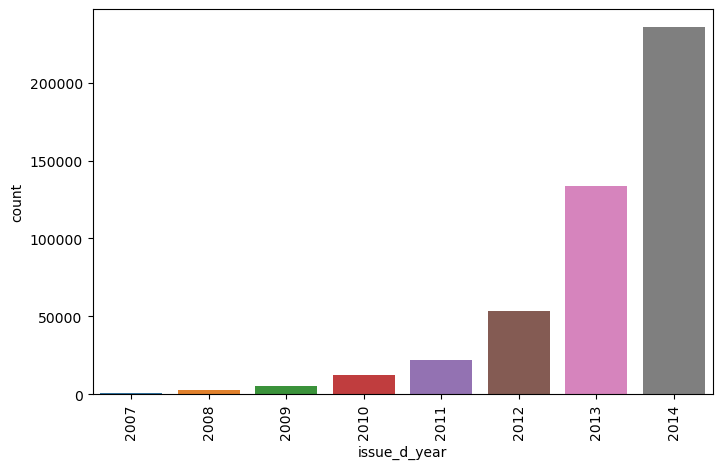

In [172]:
plt.figure(figsize=(8,5))
sns.countplot(df_date, x=df_date.issue_d_year.sort_values())
plt.xticks(rotation=90)
plt.show()

The most funded loan years were in 2014, meaning that the number of loans approved is increasing every year.

#### earliest_cr_line_year features

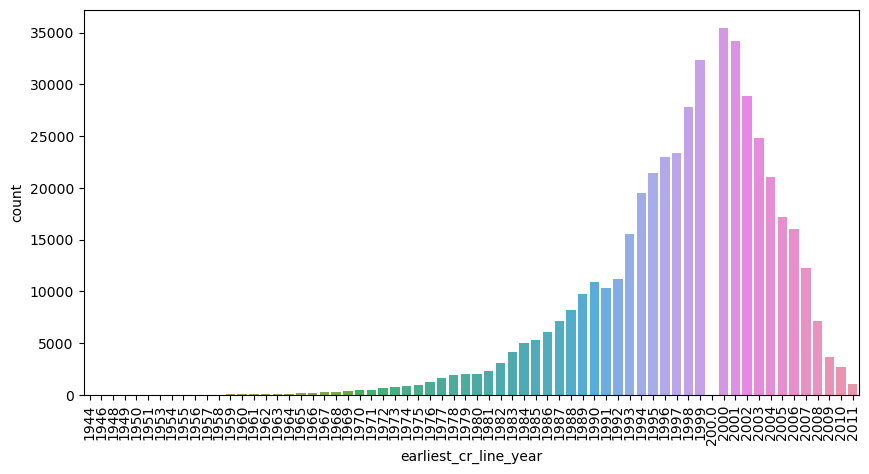

In [173]:
plt.figure(figsize=(10,5))
sns.countplot(df_date, x=df_date.earliest_cr_line_year.sort_values())
plt.xticks(rotation=90)
plt.show()

The month in which the borrower first opened the reported credit limit is skew negatively distributed 

#### last_pymnt_d_year features

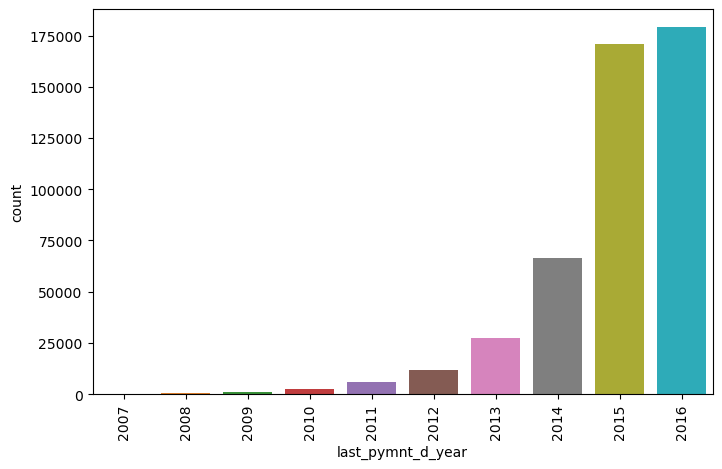

In [174]:
plt.figure(figsize=(8,5))
sns.countplot(df_date, x=df_date.last_pymnt_d_year.sort_values())
plt.xticks(rotation=90)
plt.show()

Most annual payments received in 2016

#### next_pymnt_d_year features

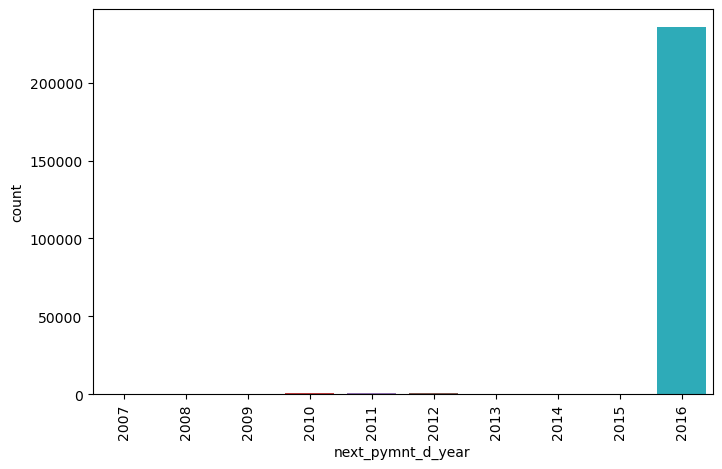

In [175]:
plt.figure(figsize=(8,5))
sns.countplot(df_date, x=df_date.next_pymnt_d_year.sort_values())
plt.xticks(rotation=90)
plt.show()

The next scheduled payment date is dominated by 2016

#### last_credit_pull_d_year features

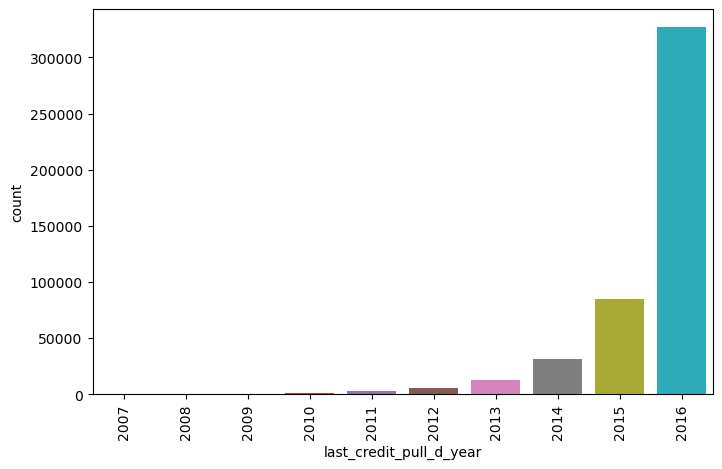

In [176]:
plt.figure(figsize=(8,5))
sns.countplot(df_date, x=df_date.last_credit_pull_d_year.sort_values())
plt.xticks(rotation=90)
plt.show()

The last credit pull year payment is dominated by 2016

#### loan_status feature

In [177]:
df_cat = df_an.copy()

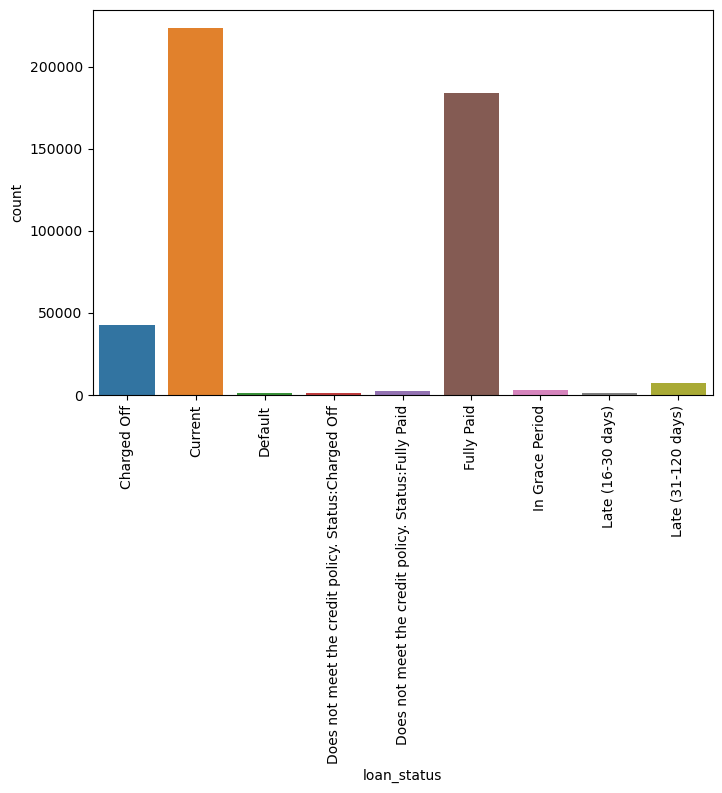

In [178]:
plt.figure(figsize=(8,5))
sns.countplot(df_cat, x=df_an.loan_status.sort_values())
plt.xticks(rotation=90)
plt.show()

most loan statuses are current and fully paid, which means that there are more good borrowers (paying) than bad ones (not paying). 

#### empth_length features

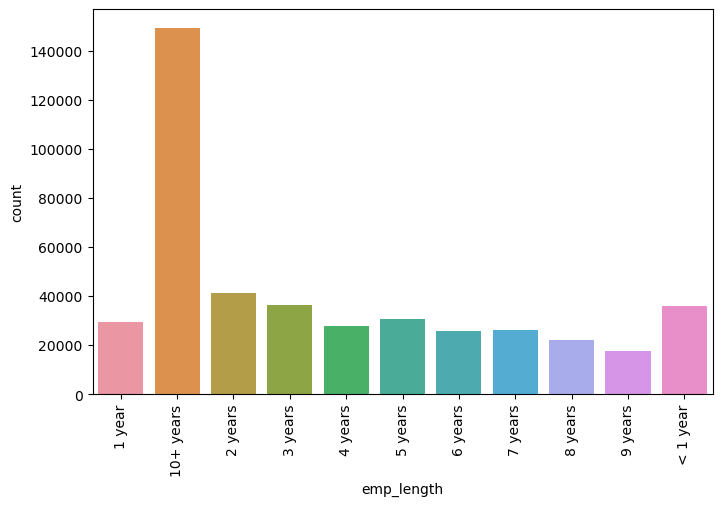

In [179]:
plt.figure(figsize=(8,5))
sns.countplot(df_cat, x=df_an.emp_length.sort_values())
plt.xticks(rotation=90)
plt.show()

Most borrowers' years of service are > 10 years, while borrowers' years of service < 1 year are ranked second.

#### grade and sub_grade feature

In [180]:
df_cat['grade'] = df_cat['grade'].sort_values()
df_cat['sub_grade'] = df_cat['sub_grade'].sort_values()

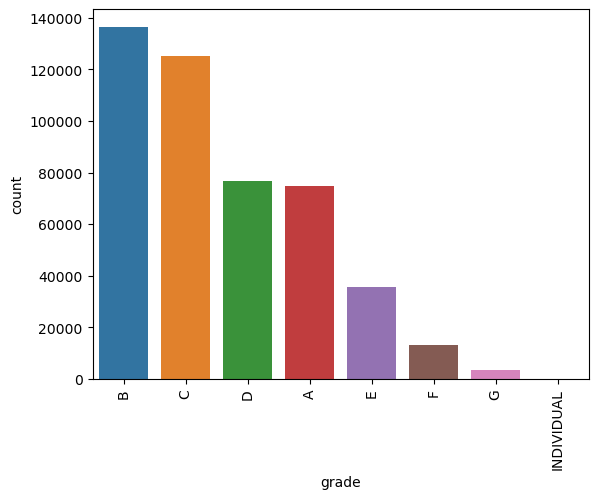

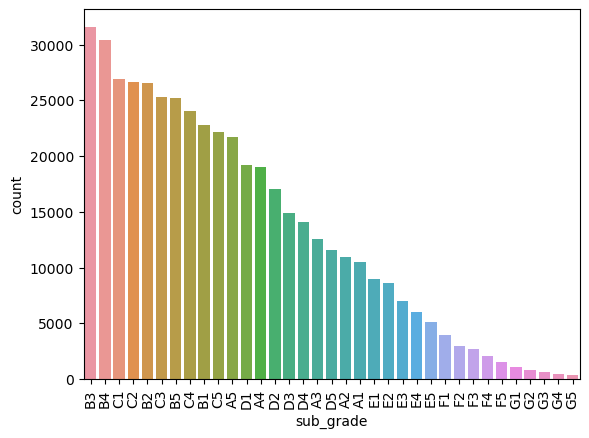

In [181]:
df_grad = ['grade', 'sub_grade']

for col in df_grad:
    # Count the number of occurrences and convert to DataFrame
    value_counts = df_cat[col].value_counts().reset_index()  
    # Renaming columns
    value_counts = value_counts.rename(columns={col: 'count', 'index': col})  
    # Sort DataFrame by 'count' column
    value_counts = value_counts.sort_values(by='count', ascending=False)

    # Draw a countplot with the sorted order
    fig = sns.barplot(data=value_counts, x=col, y='count')
    plt.xticks(rotation=90)
    plt.show()

The grade of the most borrowers is B, C and D, meaning that the average borrower grade is a good borrower. for details of its classification can be seen in sub_grade

#### Term feature

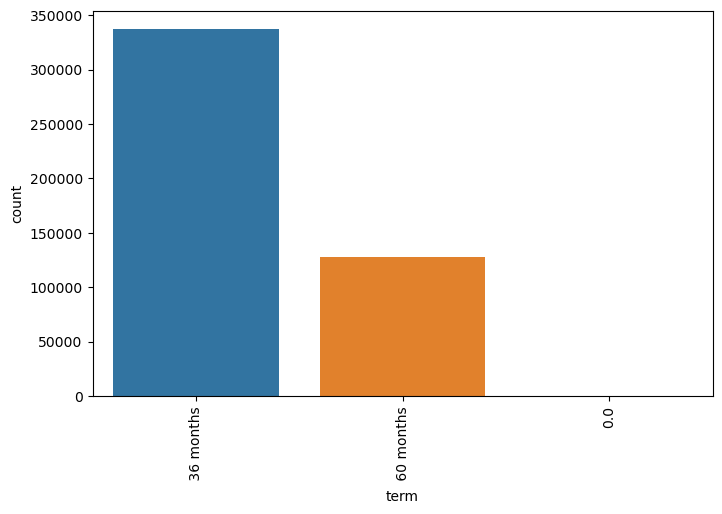

In [182]:
plt.figure(figsize=(8,5))
sns.countplot(df_cat, x=df_an.term.sort_values())
plt.xticks(rotation=90)
plt.show()

#### pymnt_plan feature

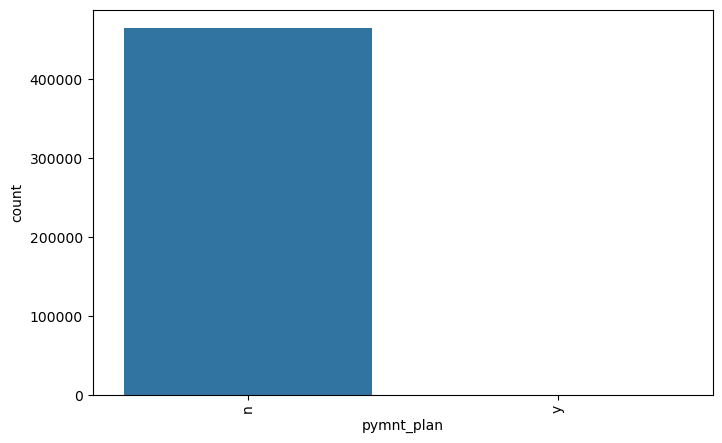

In [183]:
plt.figure(figsize=(8,5))
sns.countplot(df_cat, x=df_an.pymnt_plan.sort_values())
plt.xticks(rotation=90)
plt.show()

#### home_ownership feature

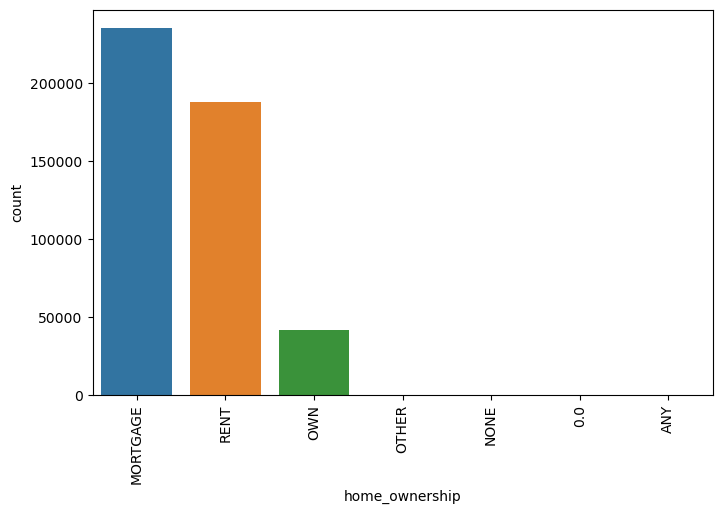

In [184]:
plt.figure(figsize=(8,5))
sorted_home_ownership = df_an['home_ownership'].value_counts().index
sns.countplot(data=df_an, x='home_ownership', order=sorted_home_ownership)
plt.xticks(rotation=90)
plt.show()


#### purpose feature

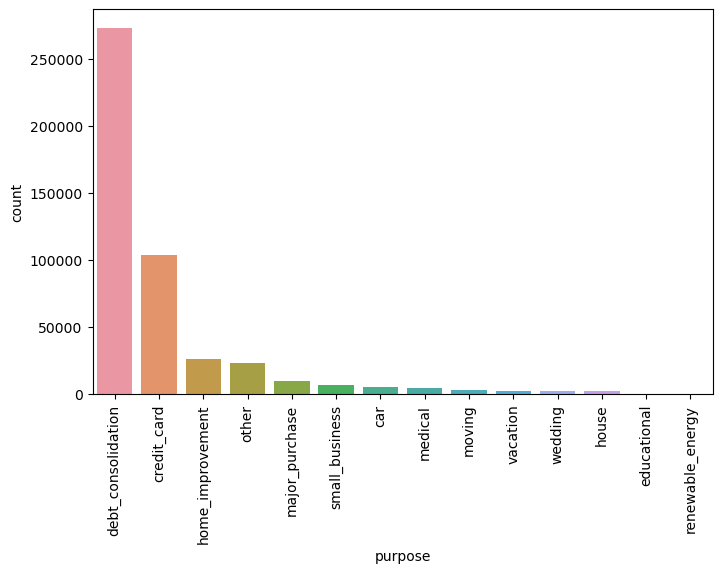

In [185]:
plt.figure(figsize=(8,5))
sorted_purpose = df_an['purpose'].value_counts().index
sns.countplot(data=df_cat, x='purpose', order=sorted_purpose)
plt.xticks(rotation=90)
plt.show()

#### initial_list_status feature

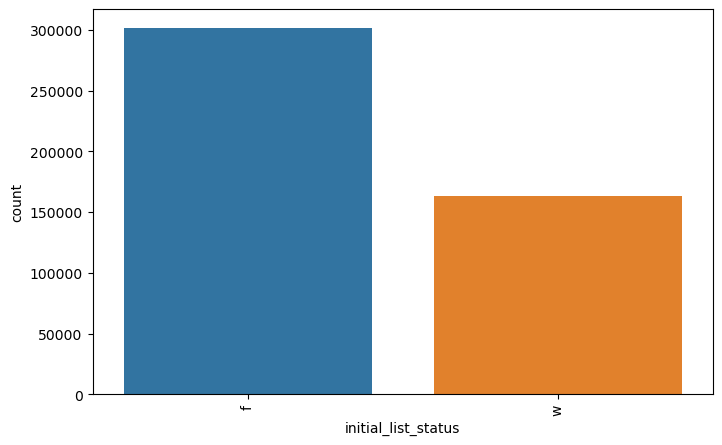

In [186]:
plt.figure(figsize=(8,5))
sns.countplot(df_cat, x=df_an.initial_list_status.sort_values())
plt.xticks(rotation=90)
plt.show()

In [187]:
import hvplot.pandas

### Bivariate Analysis : Categorical Features

#### loan_amnt & installment
* installment: The monthly payment owed by the borrower if the loan originates.
* loan_amnt: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

In [188]:
# Then you can create a visualization by using hvplot
installment = df_an.hvplot.hist(
    y='installment', by='target', subplots=False, 
    width=350, height=400, bins=50, alpha=0.4, 
    title="Installment by Loan Status", 
    xlabel='Installment', ylabel='Counts', legend='top'
)

loan_amnt = df_an.hvplot.hist(
    y='loan_amnt', by='target', subplots=False, 
    width=350, height=400, bins=30, alpha=0.4, 
    title="Loan Amount by Loan Status", 
    xlabel='Loan Amount', ylabel='Counts', legend='top'
)

# Then you can combine visualizations using the '+' operator
installment + loan_amnt

d:\anaconda3\Lib\site-packages\holoviews\core\data\pandas.py:222: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  data = [(k, group_type(v, **group_kwargs)) for k, v in
d:\anaconda3\Lib\site-packages\holoviews\core\data\pandas.py:222: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  data = [(k, group_type(v, **group_kwargs)) for k, v in


:Layout
   .NdOverlay.I  :NdOverlay   [target]
      :Histogram   [installment]   (installment_count)
   .NdOverlay.II :NdOverlay   [target]
      :Histogram   [loan_amnt]   (loan_amnt_count)

#### int_rate & annual_inc
* int_rate: Interest Rate on the loan
* annual_inc: The self-reported annual income provided by the borrower during registration

In [189]:
int_rate = df_an.hvplot.hist(
    y='int_rate', by='target', alpha=0.3, width=350, height=400,
    title="Loan Status by Interest Rate", xlabel='Interest Rate', ylabel='Loans Counts', 
    legend='top'
)

annual_inc = df_an.hvplot.hist(
    y='annual_inc', by='target', bins=50, alpha=0.3, width=350, height=400,
    title="Loan Status by Annual Income", xlabel='Annual Income', ylabel='Loans Counts', 
    legend='top'
).opts(xrotation=45)

int_rate + annual_inc

d:\anaconda3\Lib\site-packages\holoviews\core\data\pandas.py:222: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  data = [(k, group_type(v, **group_kwargs)) for k, v in
d:\anaconda3\Lib\site-packages\holoviews\core\data\pandas.py:222: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  data = [(k, group_type(v, **group_kwargs)) for k, v in


:Layout
   .NdOverlay.I  :NdOverlay   [target]
      :Histogram   [int_rate]   (int_rate_count)
   .NdOverlay.II :NdOverlay   [target]
      :Histogram   [annual_inc]   (annual_inc_count)

In [190]:
print(categorical)

['funded_amnt', 'funded_amnt_inv', 'term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'application_type']


In [191]:
cat = ['term', 'grade','emp_length', 'home_ownership', 'verification_status',
        'pymnt_plan', 'purpose', 'initial_list_status']

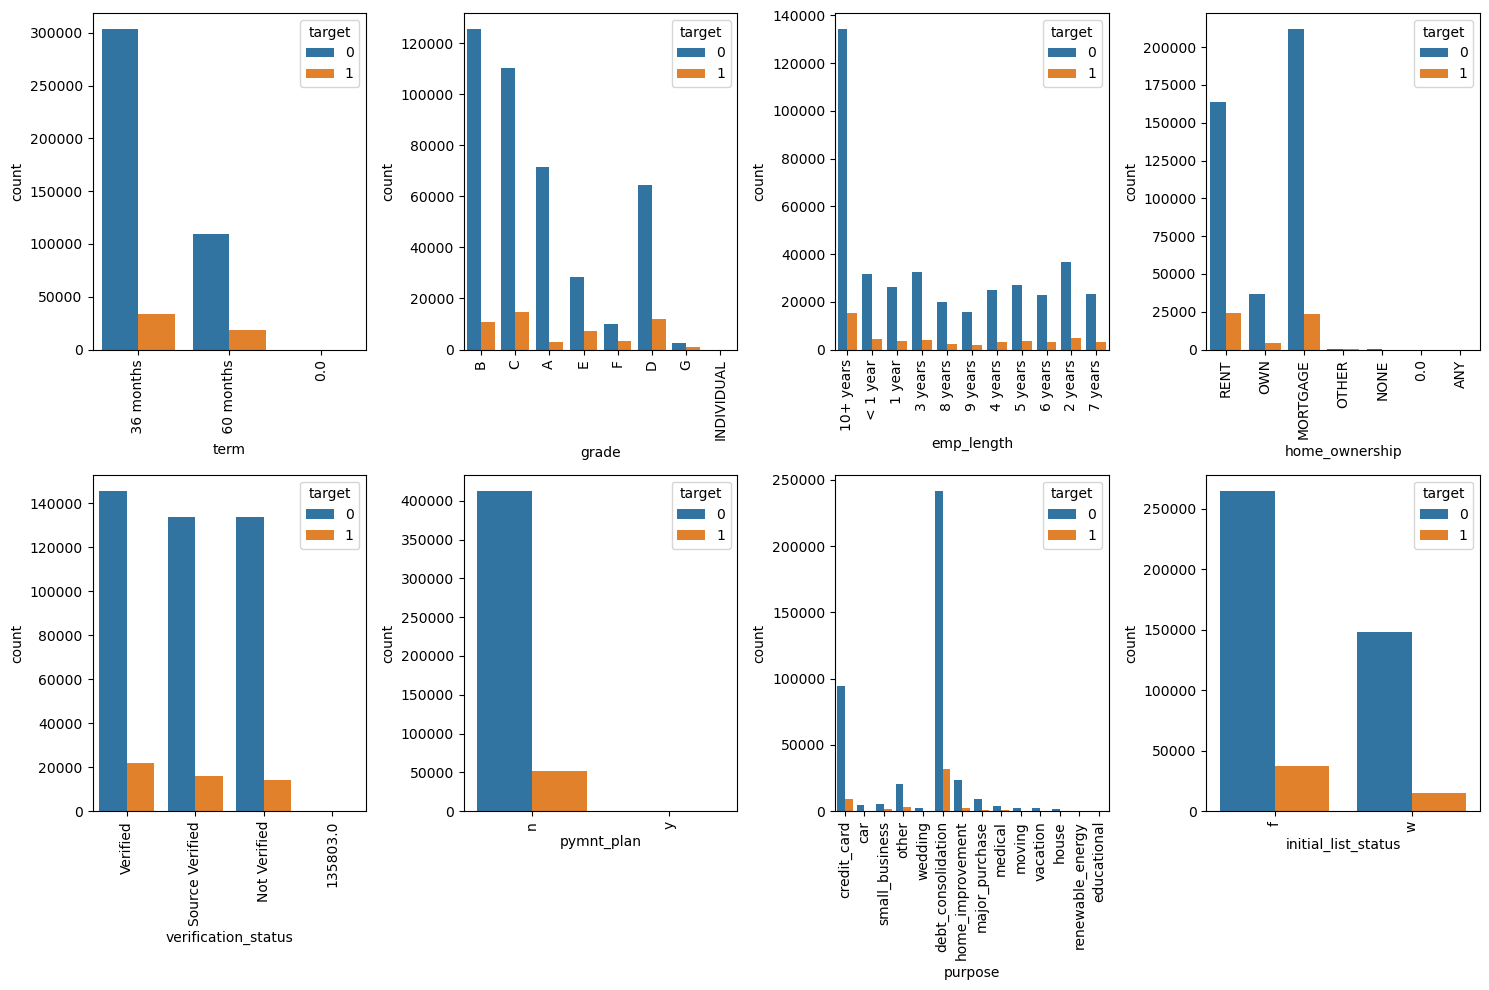

In [192]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))  # Mengatur ukuran gambar

# Mengubah tata letak subplot menjadi 2 baris dan 4 kolom
for i in range(0, len(cat)):
    plt.subplot(2, 4, i+1)
    sns.countplot(x=cat[i], data=df_cat, hue='target')
    plt.xlabel(cat[i])
    plt.xticks(rotation=90)
    plt.tight_layout()

plt.show()

In [193]:
df_drop = df1[['target']]

In [194]:
df_date['target'] = df_drop['target']
df_date.head()

,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,last_pymnt_d_month,last_pymnt_d_year,next_pymnt_d_month,next_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year,target
0,Dec,2011,Jan,1985,Jan,2015,NaN,NaN,Jan,2016,0
1,Dec,2011,Apr,1999,Apr,2013,NaN,NaN,Sep,2013,1
2,Dec,2011,Nov,2001,Jun,2014,NaN,NaN,Jan,2016,0
3,Dec,2011,Feb,1996,Jan,2015,NaN,NaN,Jan,2015,0
4,Dec,2011,Jan,1996,Jan,2016,Feb,2016,Jan,2016,0


In [195]:
df_date.target.value_counts()

0    412908
1     52062
Name: target, dtype: int64

In [196]:
years = ['issue_d_year','last_pymnt_d_year','next_pymnt_d_year','last_credit_pull_d_year']

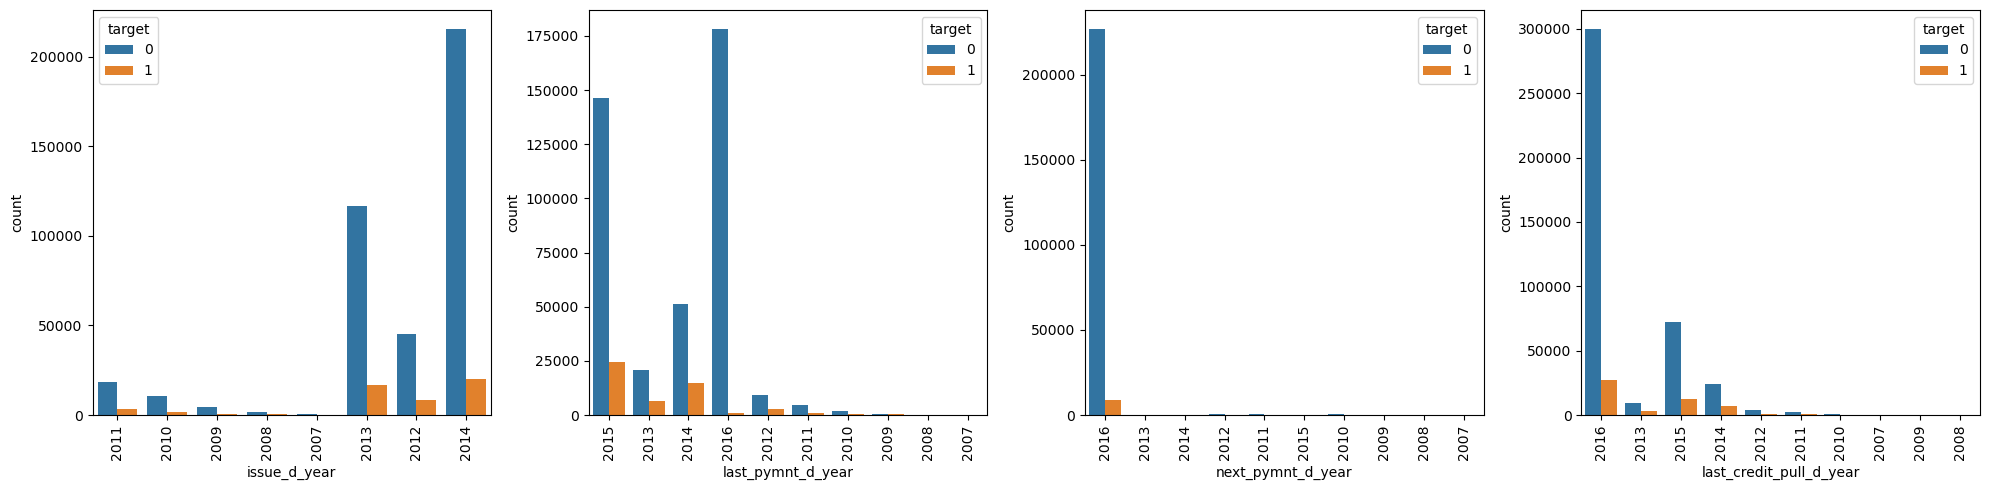

In [197]:
plt.figure(figsize=(20, 5))
for i in range(0, len(years)):
    plt.subplot(1, 4, i+1)
    sns.countplot(x=years[i], data=df_date, hue=df_date['target'])
    plt.xlabel(years[i])
    plt.xticks(rotation=90)
    plt.tight_layout()

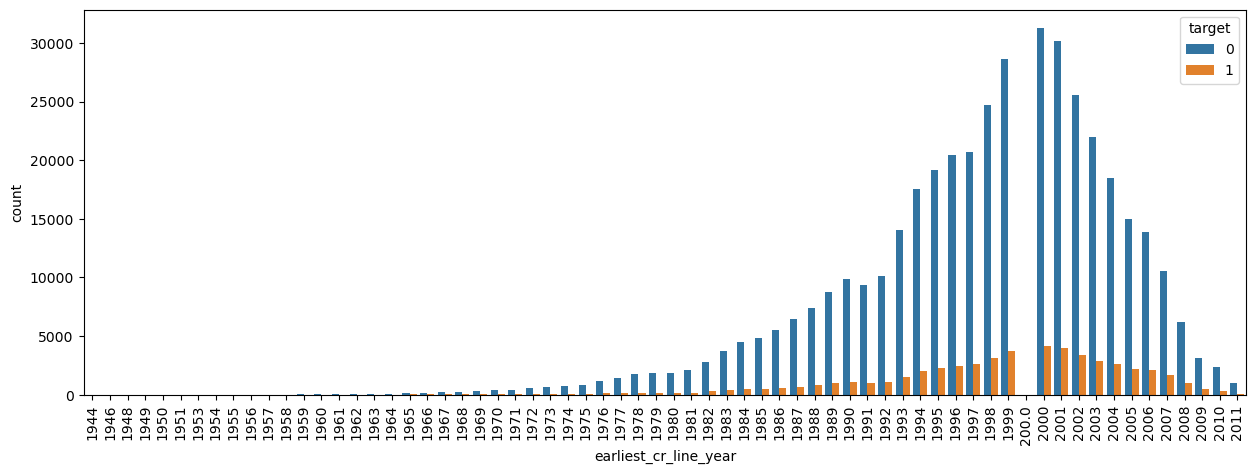

In [198]:
plt.figure(figsize=(15,5))
sns.countplot(x=df_date['earliest_cr_line_year'].sort_values(), hue=df_date['target'])
plt.xticks(rotation=90)
plt.show()

### Data Correlation

C:\Users\hudza\AppData\Local\Temp\ipykernel_5388\400584356.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_an.corr(), annot=True, cmap="RdYlGn")


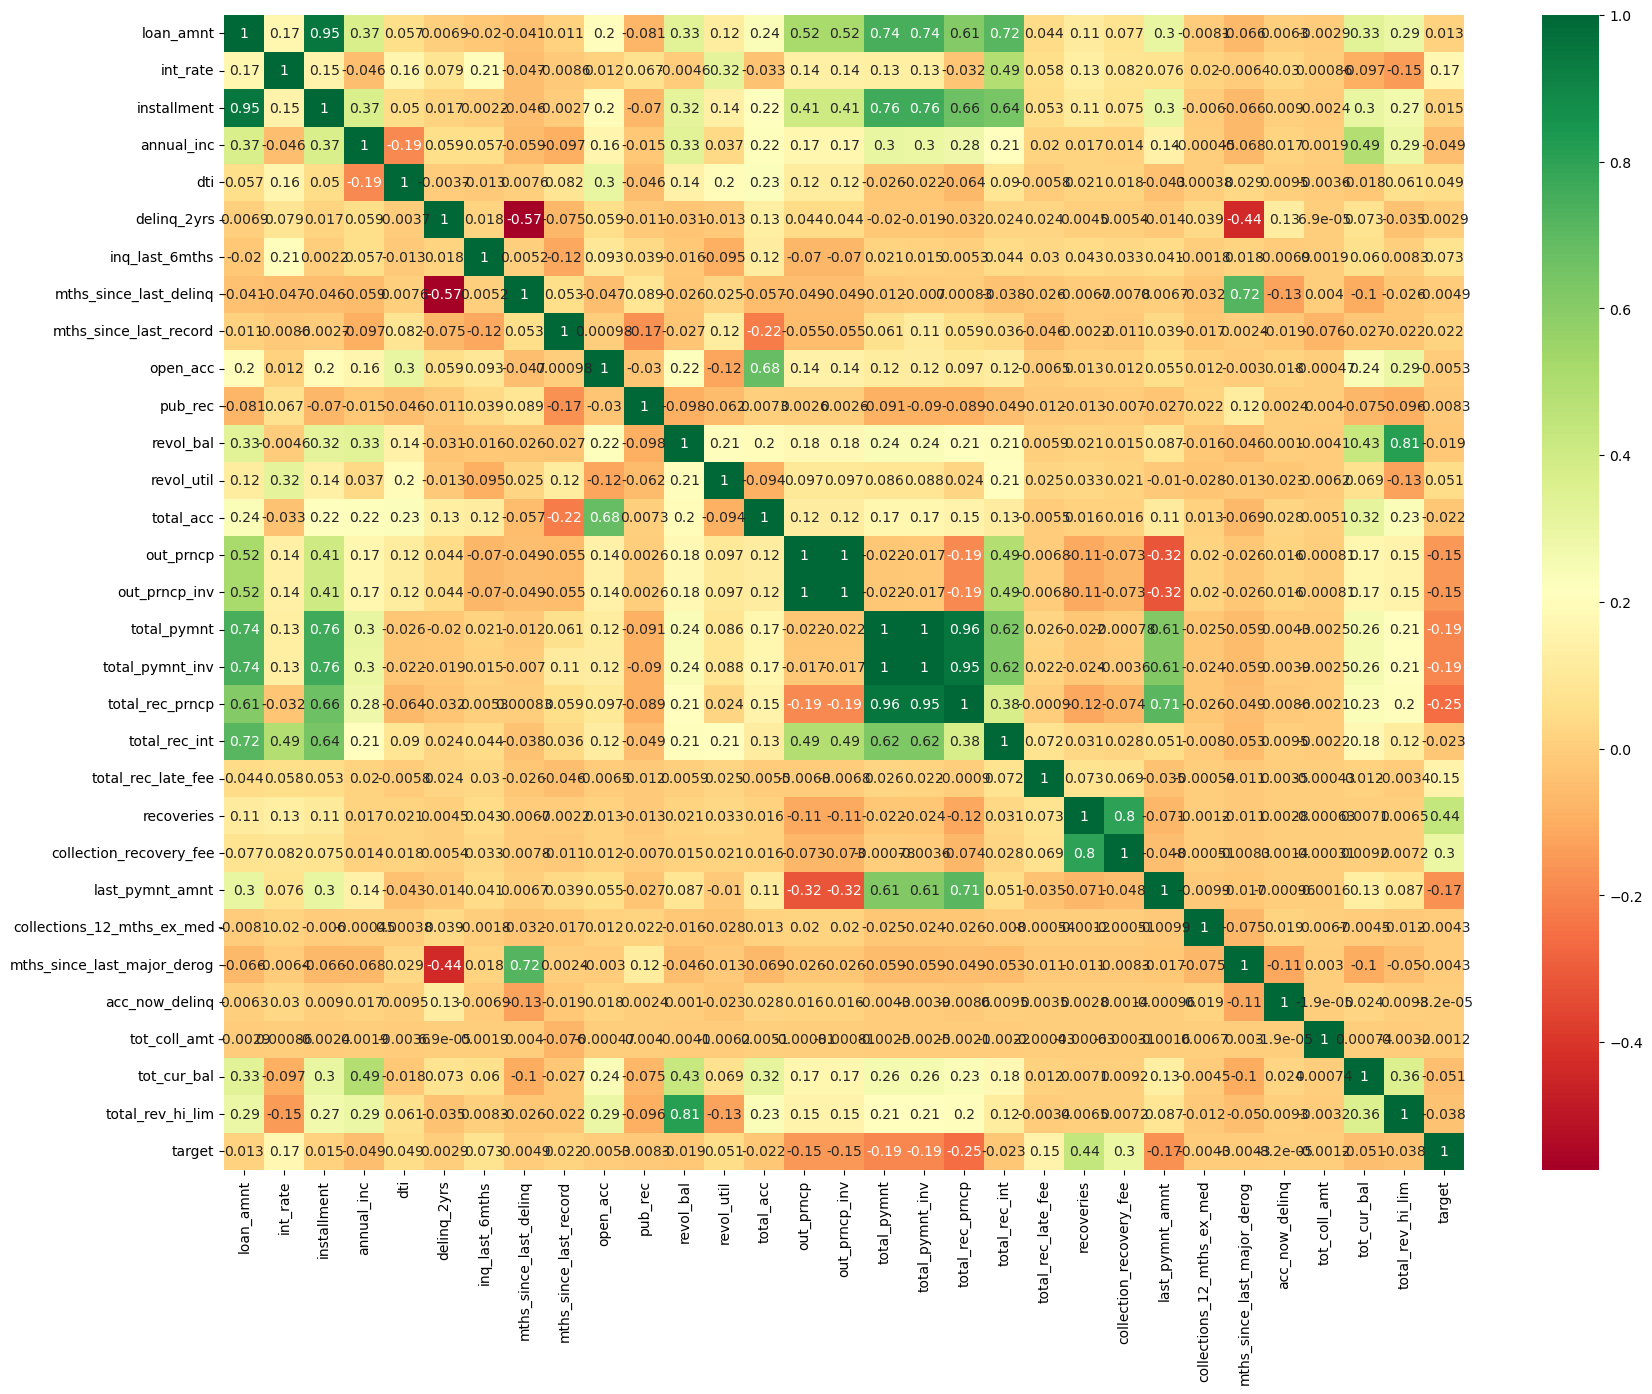

In [199]:
plt.figure(figsize=(20,15))
sns.heatmap(df_an.corr(), annot=True, cmap="RdYlGn")
plt.show()

### Check and Handling Missing Value

In [200]:
# Check persentase missing values untuk setiap fitur
mis_value = df_an.isnull().mean() * 100
mis_value = mis_value[mis_value > 0].reset_index()
mis_value.columns = ['feature', '%']

# Menampilkan DataFrame mis_value
print(mis_value)

                        feature          %
0                      int_rate   0.000215
1                     sub_grade   0.000215
2                    emp_length   4.507173
3                    annual_inc   0.000860
4                       issue_d   0.000215
5                   loan_status   0.000215
6                    pymnt_plan   0.000215
7                       purpose   0.000215
8                           dti   0.000215
9                   delinq_2yrs   0.006452
10             earliest_cr_line   0.006237
11               inq_last_6mths   0.006452
12       mths_since_last_delinq  53.683033
13       mths_since_last_record  86.566230
14                     open_acc   0.006452
15                      pub_rec   0.006452
16                    revol_bal   0.000215
17                   revol_util   0.073338
18                    total_acc   0.006452
19          initial_list_status   0.000215
20                    out_prncp   0.000215
21                out_prncp_inv   0.000215
22         

In [201]:
#filter feature yang punya null values > 40%
mis_value1 = list(mis_value['feature'][mis_value['%']>40])
mis_value2 = list(mis_value['feature'][mis_value['%']<40])

print(f"Null feature > 40%: {mis_value1} \n Null feature < 40%: {mis_value2}")

Null feature > 40%: ['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog'] 
 Null feature < 40%: ['int_rate', 'sub_grade', 'emp_length', 'annual_inc', 'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']


In [202]:
# drop feature yang punya null values >40%
df_an.drop(columns=mis_value1,inplace=True)
df_an.shape

(464970, 44)

## Data Splitting

In [203]:
df_an.shape

(464970, 44)

In [204]:
from sklearn.model_selection import train_test_split

In [205]:
X = df_an.drop('target', axis=1)
y = df_an['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify= y,random_state=42)

In [206]:
y_train.value_counts(normalize=True)

0    0.88803
1    0.11197
Name: target, dtype: float64

In [207]:
y_test.value_counts(normalize=True)

0    0.888036
1    0.111964
Name: target, dtype: float64

## Data Cleaning & Feature Engineering

In [208]:
X_train.shape

(371976, 43)

In [209]:
# Can be printed for all unique values of a column, so you can check one by one
# what unique values are dirty.

for col in X_train.select_dtypes(include= ['object','category']).columns:
    print(col)
    print(X_train[col].unique())
    print()


funded_amnt
['7000' '7550' '35000' ... '32725' '30425' '33100']

funded_amnt_inv
['7000.0' '7550.0' '35000.0' ... '16213.47061' '23468.196930000002'
 '1199.992159']

term
[' 36 months' ' 60 months' '0.0']

grade
['A' 'C' 'F' 'E' 'D' 'B' 'G' 'INDIVIDUAL']

sub_grade
['A1' 'C2' 'C5' 'F2' 'E4' 'D3' 'D2' 'E3' 'B4' 'D1' 'C4' 'A5' 'A4' 'B1'
 'D4' 'D5' 'B2' 'C1' 'B3' 'C3' 'B5' 'G1' 'E1' 'A3' 'F3' 'E2' 'A2' 'E5'
 'F1' 'F5' 'F4' 'G3' 'G4' 'G2' 'G5' nan]

emp_length
['5 years' '7 years' '1 year' '10+ years' '< 1 year' '3 years' '6 years'
 '9 years' '8 years' '2 years' nan '4 years']

home_ownership
['OWN' 'MORTGAGE' 'RENT' 'OTHER' 'ANY' 'NONE' '0.0']

verification_status
['Not Verified' 'Source Verified' 'Verified' '135803.0']

issue_d
['Nov-14' 'Oct-14' 'Jun-14' 'Nov-12' 'Sep-13' 'Jul-14' 'Mar-14' 'Dec-13'
 'Oct-12' 'Jul-12' 'Sep-14' 'Oct-13' 'Sep-12' 'Nov-13' 'Jun-13' 'Feb-13'
 'Apr-14' 'Apr-13' 'Aug-13' 'Jan-13' 'Dec-14' 'Mar-13' 'Feb-14' 'Feb-12'
 'Jul-11' 'Jul-13' 'Aug-14' 'May-13' 'Aug-12'

In [210]:
# Columns/features that need to be cleaned
col_need_to_clean = ['term', 'emp_length', 'issue_d', 'earliest_cr_line', 'last_pymnt_d' 
                    ,'last_credit_pull_d']


In [211]:
# Removing 'months' to become ''
X_train['term'].str.replace(' months', '')

254927     36
281260     36
367212     36
364021     60
184808     60
         ... 
413122     60
363434     60
240040     36
241457     36
303713     36
Name: term, Length: 371976, dtype: object

In [212]:
# Convert data type into numeric 
X_train['term'] = pd.to_numeric(X_train['term'].str.replace(' months', ''))

In [213]:
X_train['term'].astype(int)

254927    36
281260    36
367212    36
364021    60
184808    60
          ..
413122    60
363434    60
240040    36
241457    36
303713    36
Name: term, Length: 371976, dtype: int32

In [214]:
X_train['term'].unique()

array([36., 60.,  0.])

In [215]:
X_train['term'] = X_train['term'].replace(0, 60)

In [216]:
X_train['term'].unique()

array([36., 60.])

In [217]:
# Check what values need to be cleaned
X_train['emp_length'].unique()

array(['5 years', '7 years', '1 year', '10+ years', '< 1 year', '3 years',
       '6 years', '9 years', '8 years', '2 years', nan, '4 years'],
      dtype=object)

In [218]:
X_train['emp_length'] = X_train['emp_length'].str.replace('\+ years', '')
X_train['emp_length'] = X_train['emp_length'].str.replace(' years', '')
X_train['emp_length'] = X_train['emp_length'].str.replace('< 1 year', str(0))
X_train['emp_length'] = X_train['emp_length'].str.replace(' year', '')

X_train['emp_length'].fillna(value = 0, inplace=True)
X_train['emp_length'] = pd.to_numeric(X_train['emp_length'])

C:\Users\hudza\AppData\Local\Temp\ipykernel_5388\1211147721.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  X_train['emp_length'] = X_train['emp_length'].str.replace('\+ years', '')


In [219]:
X_train['emp_length']

254927     5
281260     7
367212     5
364021     1
184808    10
          ..
413122     1
363434     7
240040     8
241457     7
303713     4
Name: emp_length, Length: 371976, dtype: int64

In [220]:
# Check Date Feature['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']
col_date = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']

X_train[col_date]

,issue_d,earliest_cr_line,last_pymnt_d,last_credit_pull_d
254927,Nov-14,Jun-93,Jan-16,Jan-16
281260,Oct-14,Nov-06,Jan-16,Jan-16
367212,Jun-14,Jul-02,Dec-15,Jan-16
364021,Jun-14,Aug-92,Jan-16,Jan-16
184808,Nov-12,Nov-93,Jan-14,Jan-14
...,...,...,...,...
413122,Apr-14,Dec-00,Sep-15,Jan-16
363434,Jun-14,Jan-05,Jan-16,Jan-16
240040,Dec-14,Jun-00,Jan-16,Jan-16
241457,Nov-14,Jul-95,Jun-15,Jul-15


In [221]:
for column in col_date:
    mode_value = X_train[column].mode()[0]
    X_train[column].fillna(mode_value, inplace=True)

# Check if null data has been filled with mode
missing_values_after_fillna = X_train[['issue_d', 'earliest_cr_line', 'last_pymnt_d', 
                                       'last_credit_pull_d']].isnull().sum()
print("Number of Missing Values After Filling Mode:")
print(missing_values_after_fillna)


Number of Missing Values After Filling Mode:
issue_d               0
earliest_cr_line      0
last_pymnt_d          0
last_credit_pull_d    0
dtype: int64


In [222]:
X_train['earliest_cr_line'] = X_train['earliest_cr_line'].replace('26200.0', 'Oct-00')

In [223]:
X_train[col_date] = X_train[col_date].astype(str)
X_train[col_date].dtypes

issue_d               object
earliest_cr_line      object
last_pymnt_d          object
last_credit_pull_d    object
dtype: object

In [224]:
X_train['issue_d'].unique()

array(['Nov-14', 'Oct-14', 'Jun-14', 'Nov-12', 'Sep-13', 'Jul-14',
       'Mar-14', 'Dec-13', 'Oct-12', 'Jul-12', 'Sep-14', 'Oct-13',
       'Sep-12', 'Nov-13', 'Jun-13', 'Feb-13', 'Apr-14', 'Apr-13',
       'Aug-13', 'Jan-13', 'Dec-14', 'Mar-13', 'Feb-14', 'Feb-12',
       'Jul-11', 'Jul-13', 'Aug-14', 'May-13', 'Aug-12', 'Apr-12',
       'Aug-11', 'Oct-11', 'Mar-09', 'May-09', 'Jan-14', 'Sep-11',
       'May-14', 'Jun-12', 'Mar-12', 'Dec-09', 'May-11', 'Dec-12',
       'Feb-10', 'May-12', 'Jul-10', 'Mar-10', 'May-10', 'Aug-10',
       'Jan-08', 'Apr-10', 'Feb-09', 'Jun-10', 'Mar-11', 'Apr-11',
       'Dec-11', 'Nov-11', 'Sep-09', 'Jun-08', 'Dec-10', 'Jun-11',
       'Aug-09', 'Jan-12', 'Jan-10', 'Jan-11', 'Nov-09', 'Jul-09',
       'Sep-10', 'Nov-10', 'Feb-11', 'Apr-09', 'Aug-07', 'Oct-10',
       'Nov-07', 'Jul-08', 'Oct-09', 'Dec-08', 'Jun-09', 'Dec-07',
       'Aug-08', 'Jul-07', 'Feb-08', 'Nov-08', 'Apr-08', 'Oct-07',
       'Mar-08', 'Jan-09', 'Jun-07', 'Sep-07', 'Sep-08', 'Oct-

In [225]:
# List the dates that will be converted
# issue_d has been converted so it is not included in the list
date_conv = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']

In [226]:
# convert date_conv to datetime format
from datetime import datetime as dt
for col in date_conv:
    X_train[col] = pd.to_datetime(X_train[col].apply(lambda x: dt.strptime(x, '%b-%y')))

In [227]:
X_train[['issue_d','last_pymnt_d','last_credit_pull_d','earliest_cr_line']].head()

,issue_d,last_pymnt_d,last_credit_pull_d,earliest_cr_line
254927,2014-11-01,2016-01-01,2016-01-01,1993-06-01
281260,2014-10-01,2016-01-01,2016-01-01,2006-11-01
367212,2014-06-01,2015-12-01,2016-01-01,2002-07-01
364021,2014-06-01,2016-01-01,2016-01-01,1992-08-01
184808,2012-11-01,2014-01-01,2014-01-01,1993-11-01


In [228]:
X_train.drop(columns='loan_status', inplace=True)

In [229]:
X_train.shape

(371976, 42)

#### grad & sub_grad features

In [230]:
X_train['grade'].unique()

array(['A', 'C', 'F', 'E', 'D', 'B', 'G', 'INDIVIDUAL'], dtype=object)

In [231]:
X_train = X_train[X_train['grade'] != 'INDIVIDUAL']

In [232]:
X_train['grade'].unique()

array(['A', 'C', 'F', 'E', 'D', 'B', 'G'], dtype=object)

grad and sub_grad features refer to the same thing, so we will choose the grad feature because it has fewer categories.

In [233]:
X_train.drop(columns='sub_grade', inplace=True)

In [234]:
X_train.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'pymnt_plan', 'purpose', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

home_ownership cleaning

In [235]:
X_train.home_ownership.replace({'NONE':'OTHER','ANY':'OTHER','OWN':'OTHER'},inplace=True)
X_train.home_ownership.unique()

array(['OTHER', 'MORTGAGE', 'RENT'], dtype=object)

In [236]:
X_train['pymnt_plan'].value_counts()

n    371969
y         6
Name: pymnt_plan, dtype: int64

pymnt_plan has a large data imbalance so this feature will be dropped. 

In [237]:
X_train.drop(columns='pymnt_plan', inplace=True)

### Repeats all steps of X_train on X_test 

In [238]:
X_test.shape

(92994, 43)

In [239]:
# Removing 'months' to become ''
X_test['term'].str.replace(' months', '')
# Convert data type into numeric 
X_test['term'] = pd.to_numeric(X_test['term'].str.replace(' months', ''))
X_test['term'].astype(int)
X_test['term'] = X_test['term'].replace(0, 60)

X_test['emp_length'] = X_test['emp_length'].str.replace('\+ years', '')
X_test['emp_length'] = X_test['emp_length'].str.replace(' years', '')
X_test['emp_length'] = X_test['emp_length'].str.replace('< 1 year', str(0))
X_test['emp_length'] = X_test['emp_length'].str.replace(' year', '')

X_test['emp_length'].fillna(value = 0, inplace=True)
X_test['emp_length'] = pd.to_numeric(X_test['emp_length'])

for column in col_date:
    mode_value = X_test[column].mode()[0]
    X_test[column].fillna(mode_value, inplace=True)

missing_values_after_fillna = X_test[['issue_d', 'earliest_cr_line', 'last_pymnt_d', 
                                       'last_credit_pull_d']].isnull().sum()
X_test['earliest_cr_line'] = X_test['earliest_cr_line'].replace('26200.0', 'Oct-00')
X_test[col_date] = X_test[col_date].astype(str)

for col in date_conv:
    X_test[col] = pd.to_datetime(X_test[col].apply(lambda x: dt.strptime(x, '%b-%y')))
    
X_test.drop(columns='loan_status', inplace=True)

X_test = X_test[X_test['grade'] != 'INDIVIDUAL']

X_test.drop(columns='sub_grade', inplace=True)

X_test.home_ownership.replace({'NONE':'OTHER','ANY':'OTHER','OWN':'OTHER'},inplace=True)
X_test.home_ownership.unique()

X_test.drop(columns='pymnt_plan', inplace=True)

C:\Users\hudza\AppData\Local\Temp\ipykernel_5388\895170417.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  X_test['emp_length'] = X_test['emp_length'].str.replace('\+ years', '')


In [240]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92994 entries, 191279 to 436007
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   loan_amnt                   92994 non-null  int64         
 1   funded_amnt                 92994 non-null  object        
 2   funded_amnt_inv             92994 non-null  object        
 3   term                        92994 non-null  int64         
 4   int_rate                    92994 non-null  float64       
 5   installment                 92994 non-null  float64       
 6   grade                       92994 non-null  object        
 7   emp_length                  92994 non-null  int64         
 8   home_ownership              92994 non-null  object        
 9   annual_inc                  92994 non-null  float64       
 10  verification_status         92994 non-null  object        
 11  issue_d                     92994 non-null  date

### feature engineering

In [241]:
for col in X_train.select_dtypes(include= ['object']).columns:
    print(col)
    print(X_train[col].unique())
    print()

funded_amnt
['7000' '7550' '35000' ... '32725' '30425' '33100']

funded_amnt_inv
['7000.0' '7550.0' '35000.0' ... '16213.47061' '23468.196930000002'
 '1199.992159']

grade
['A' 'C' 'F' 'E' 'D' 'B' 'G']

home_ownership
['OTHER' 'MORTGAGE' 'RENT']

verification_status
['Not Verified' 'Source Verified' 'Verified']

purpose
['credit_card' 'debt_consolidation' 'other' 'home_improvement' 'medical'
 'major_purchase' 'moving' 'small_business' 'vacation' 'house' 'car'
 'wedding' 'educational' 'renewable_energy']

initial_list_status
['f' 'w']



In [242]:
X_train['funded_amnt_inv'] = X_train['funded_amnt_inv'].str.replace('.', '', regex=False).astype(np.int64)

In [243]:
X_train['funded_amnt'] = X_train['funded_amnt'].astype('int64')

In [244]:
X_test['funded_amnt_inv'] = X_test['funded_amnt_inv'].str.replace('.', '', regex=False).astype(np.int64)
X_test['funded_amnt'] = X_test['funded_amnt'].astype('int64')

#### Label Encoding

In [245]:
X_train['earliest_cr_line'].value_counts()

2000-10-01    2976
2000-08-01    2874
2001-08-01    2770
1999-10-01    2738
2001-10-01    2652
              ... 
2055-04-01       1
2056-12-01       1
2060-05-01       1
2058-07-01       1
2061-07-01       1
Name: earliest_cr_line, Length: 659, dtype: int64

In [246]:
X_train.grade.replace({'G':0,'F':1,'E':2,'D':3,'C':4,'B':5,'A':6},inplace=True)
X_train.initial_list_status.replace({'w':0,'f':1},inplace=True)

In [247]:
X_test.grade.replace({'G':0,'F':1,'E':2,'D':3,'C':4,'B':5,'A':6},inplace=True)
X_test.initial_list_status.replace({'w':0,'f':1},inplace=True)

In [248]:
X_train.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
254927,7000,7000,70000,36.0,6.03,213.05,6,5,OTHER,25000.00,...,0.0,0.0,2016-01-01,213.05,2016-01-01,0.0,0.0,0.0,6748.0,26000.0
281260,7000,7000,70000,36.0,6.03,213.05,6,7,OTHER,42733.18,...,0.0,0.0,2016-01-01,213.05,2016-01-01,0.0,0.0,0.0,13782.0,15800.0
367212,7550,7550,75500,36.0,13.35,255.67,4,5,MORTGAGE,42000.00,...,0.0,0.0,2015-12-01,255.67,2016-01-01,0.0,0.0,0.0,200241.0,35200.0
364021,35000,35000,350000,60.0,14.99,832.47,4,1,RENT,95000.00,...,0.0,0.0,2016-01-01,832.47,2016-01-01,0.0,0.0,0.0,66554.0,54400.0
184808,32350,32350,323250,60.0,23.28,917.18,1,10,RENT,110000.00,...,0.0,0.0,2014-01-01,28687.92,2014-01-01,0.0,0.0,0.0,38074.0,15200.0


#### One Hot Encoding

In [249]:
feature_onehot = ['home_ownership', 'verification_status','purpose']

In [250]:
# One hot encoding for X_train
for col in feature_onehot :
  encode = pd.get_dummies(X_train[col], prefix=col)
  X_train = X_train.join(encode)

In [251]:
# One hot encoding for X_test
for col in feature_onehot :
  encode = pd.get_dummies(X_test[col], prefix=col)
  X_test = X_test.join(encode)

In [252]:
X_train.drop(columns=feature_onehot, inplace=True)
X_test.drop(columns=feature_onehot, inplace=True)

In [253]:
X_train.tail()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,annual_inc,issue_d,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
413122,14425,14425,143750,60.0,22.45,402.11,2,1,50000.0,2014-04-01,...,0,0,0,0,0,0,0,0,0,0
363434,35000,35000,350000,60.0,16.29,856.54,3,7,85000.0,2014-06-01,...,0,0,0,0,0,0,0,0,0,0
240040,10000,10000,100000,36.0,8.19,314.25,6,8,52000.0,2014-12-01,...,0,0,0,0,0,0,0,0,0,0
241457,18450,18450,184500,36.0,17.14,659.08,3,7,55000.0,2014-11-01,...,0,0,0,0,0,0,0,0,0,0
303713,9800,9800,98000,36.0,6.49,300.32,6,4,93000.0,2014-09-01,...,0,0,0,0,0,0,0,0,0,0


In [254]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371975 entries, 254927 to 303713
Data columns (total 57 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   loan_amnt                            371975 non-null  int64         
 1   funded_amnt                          371975 non-null  int64         
 2   funded_amnt_inv                      371975 non-null  int64         
 3   term                                 371975 non-null  float64       
 4   int_rate                             371975 non-null  float64       
 5   installment                          371975 non-null  float64       
 6   grade                                371975 non-null  int64         
 7   emp_length                           371975 non-null  int64         
 8   annual_inc                           371971 non-null  float64       
 9   issue_d                              371975 non-null  datetime64[

In [255]:
X_test.isnull().sum()

loan_amnt                                  0
funded_amnt                                0
funded_amnt_inv                            0
term                                       0
int_rate                                   0
installment                                0
grade                                      0
emp_length                                 0
annual_inc                                 0
issue_d                                    0
dti                                        0
delinq_2yrs                                5
earliest_cr_line                           0
inq_last_6mths                             5
open_acc                                   5
pub_rec                                    5
revol_bal                                  0
revol_util                                61
total_acc                                  5
initial_list_status                        0
out_prncp                                  0
out_prncp_inv                              0
total_pymn

In [256]:
X_train.isnull().sum()

loan_amnt                                  0
funded_amnt                                0
funded_amnt_inv                            0
term                                       0
int_rate                                   0
installment                                0
grade                                      0
emp_length                                 0
annual_inc                                 4
issue_d                                    0
dti                                        0
delinq_2yrs                               24
earliest_cr_line                           0
inq_last_6mths                            24
open_acc                                  24
pub_rec                                   24
revol_bal                                  0
revol_util                               279
total_acc                                 24
initial_list_status                        0
out_prncp                                  0
out_prncp_inv                              0
total_pymn

In [257]:
X_train.fillna(X_train.median(), inplace=True)
X_test.fillna(X_test.median(), inplace=True)

C:\Users\hudza\AppData\Local\Temp\ipykernel_5388\1204083138.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  X_train.fillna(X_train.median(), inplace=True)


C:\Users\hudza\AppData\Local\Temp\ipykernel_5388\1204083138.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  X_test.fillna(X_test.median(), inplace=True)


In [258]:
X_train.isnull().sum()

loan_amnt                              0
funded_amnt                            0
funded_amnt_inv                        0
term                                   0
int_rate                               0
installment                            0
grade                                  0
emp_length                             0
annual_inc                             0
issue_d                                0
dti                                    0
delinq_2yrs                            0
earliest_cr_line                       0
inq_last_6mths                         0
open_acc                               0
pub_rec                                0
revol_bal                              0
revol_util                             0
total_acc                              0
initial_list_status                    0
out_prncp                              0
out_prncp_inv                          0
total_pymnt                            0
total_pymnt_inv                        0
total_rec_prncp 

In [259]:
X_test.isnull().sum()

loan_amnt                              0
funded_amnt                            0
funded_amnt_inv                        0
term                                   0
int_rate                               0
installment                            0
grade                                  0
emp_length                             0
annual_inc                             0
issue_d                                0
dti                                    0
delinq_2yrs                            0
earliest_cr_line                       0
inq_last_6mths                         0
open_acc                               0
pub_rec                                0
revol_bal                              0
revol_util                             0
total_acc                              0
initial_list_status                    0
out_prncp                              0
out_prncp_inv                          0
total_pymnt                            0
total_pymnt_inv                        0
total_rec_prncp 

## Handling Imbalance

In [260]:
# Copy Splitting data to add model trials
X1 = X.copy()
y1 = y.copy()

In [261]:
# to test 70:30 data splitting
X1_train1, X1_test1, y1_train1, y1_test1 = train_test_split(X1,y1,test_size=0.3, random_state=42)

In [262]:
print("X_train: ",X_train.shape)
print("X1_train1: ",X1_train1.shape)
print("X_test: ",X_test.shape)
print("X1_test1: ",X1_test1.shape)

X_train:  (371975, 57)
X1_train1:  (325479, 43)
X_test:  (92994, 57)
X1_test1:  (139491, 43)


y_train has a data imbalance problem, where the value of 1 is a minority. This imbalance effect can cause the f1 score to decrease.

In [263]:
y_train.value_counts(normalize=True) * 100

0    88.803041
1    11.196959
Name: target, dtype: float64

In [264]:
X_train[['issue_d','last_pymnt_d','last_credit_pull_d','earliest_cr_line']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371975 entries, 254927 to 303713
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   issue_d             371975 non-null  datetime64[ns]
 1   last_pymnt_d        371975 non-null  datetime64[ns]
 2   last_credit_pull_d  371975 non-null  datetime64[ns]
 3   earliest_cr_line    371975 non-null  datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 22.3 MB


In [265]:
X_train['issue_d:year'] = X_train['issue_d'].dt.year
X_train['issue_d:month'] = X_train['issue_d'].dt.month
X_train.drop(columns='issue_d', inplace=True)

X_train['last_pymnt_d:year'] = X_train['last_pymnt_d'].dt.year
X_train['last_pymnt_d:month'] = X_train['last_pymnt_d'].dt.month
X_train.drop(columns='last_pymnt_d', inplace=True)

X_train['last_credit_pull_d:year'] = X_train['last_credit_pull_d'].dt.year
X_train['last_credit_pull_d:month'] = X_train['last_credit_pull_d'].dt.month
X_train.drop(columns='last_credit_pull_d', inplace=True)

X_train['earliest_cr_line:year'] = X_train['earliest_cr_line'].dt.year
X_train['earliest_cr_line:month'] = X_train['earliest_cr_line'].dt.month
X_train.drop(columns='earliest_cr_line', inplace=True)

X_train.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,annual_inc,dti,...,purpose_vacation,purpose_wedding,issue_d:year,issue_d:month,last_pymnt_d:year,last_pymnt_d:month,last_credit_pull_d:year,last_credit_pull_d:month,earliest_cr_line:year,earliest_cr_line:month
254927,7000,7000,70000,36.0,6.03,213.05,6,5,25000.00,8.11,...,0,0,2014,11,2016,1,2016,1,1993,6
281260,7000,7000,70000,36.0,6.03,213.05,6,7,42733.18,14.97,...,0,0,2014,10,2016,1,2016,1,2006,11
367212,7550,7550,75500,36.0,13.35,255.67,4,5,42000.00,9.31,...,0,0,2014,6,2015,12,2016,1,2002,7
364021,35000,35000,350000,60.0,14.99,832.47,4,1,95000.00,14.97,...,0,0,2014,6,2016,1,2016,1,1992,8
184808,32350,32350,323250,60.0,23.28,917.18,1,10,110000.00,12.43,...,0,0,2012,11,2014,1,2014,1,1993,11


In [266]:
X_test['issue_d:year'] = X_test['issue_d'].dt.year
X_test['issue_d:month'] = X_test['issue_d'].dt.month
X_test.drop(columns='issue_d', inplace=True)

X_test['last_pymnt_d:year'] = X_test['last_pymnt_d'].dt.year
X_test['last_pymnt_d:month'] = X_test['last_pymnt_d'].dt.month
X_test.drop(columns='last_pymnt_d', inplace=True)

X_test['last_credit_pull_d:year'] = X_test['last_credit_pull_d'].dt.year
X_test['last_credit_pull_d:month'] = X_test['last_credit_pull_d'].dt.month
X_test.drop(columns='last_credit_pull_d', inplace=True)

X_test['earliest_cr_line:year'] = X_test['earliest_cr_line'].dt.year
X_test['earliest_cr_line:month'] = X_test['earliest_cr_line'].dt.month
X_test.drop(columns='earliest_cr_line', inplace=True)

X_test.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,annual_inc,dti,...,purpose_vacation,purpose_wedding,issue_d:year,issue_d:month,last_pymnt_d:year,last_pymnt_d:month,last_credit_pull_d:year,last_credit_pull_d:month,earliest_cr_line:year,earliest_cr_line:month
191279,15850,15850,158500,36,15.80,555.68,4,0,40440.0,26.88,...,0,0,2012,10,2015,10,2016,1,2001,6
87479,3600,3600,36000,36,15.61,125.88,4,5,73000.0,13.97,...,0,0,2013,9,2015,3,2016,1,1991,10
418822,11000,11000,110000,36,12.49,367.94,5,0,48000.0,17.75,...,0,0,2014,3,2016,1,2016,1,1989,8
205351,26400,26400,261250,36,14.33,906.53,4,1,96720.0,13.67,...,0,0,2012,8,2015,4,2015,10,1994,9
284266,7450,7450,74500,36,16.29,262.99,3,10,26000.0,24.75,...,0,0,2014,10,2015,8,2016,1,2004,8


In [267]:
# X1_train1['issue_d:year'] = X1_train1['issue_d'].dt.year
# X1_train1['issue_d:month'] = X1_train1['issue_d'].dt.month
# X1_train1.drop(columns='issue_d', inplace=True)

# X1_train1['last_pymnt_d:year'] = X1_train1['last_pymnt_d'].dt.year
# X1_train1['last_pymnt_d:month'] = X1_train1['last_pymnt_d'].dt.month
# X1_train1.drop(columns='last_pymnt_d', inplace=True)

# X1_train1['last_credit_pull_d:year'] = X1_train1['last_credit_pull_d'].dt.year
# X1_train1['last_credit_pull_d:month'] = X1_train1['last_credit_pull_d'].dt.month
# X1_train1.drop(columns='last_credit_pull_d', inplace=True)

# X1_train1['earliest_cr_line:year'] = X1_train1['earliest_cr_line'].dt.year
# X1_train1['earliest_cr_line:month'] = X1_train1['earliest_cr_line'].dt.month
# X1_train1.drop(columns='earliest_cr_line', inplace=True)

# X1_train1.head()

In [268]:
# X1_test1['issue_d:year'] = X1_test1['issue_d'].dt.year
# X1_test1['issue_d:month'] = X1_test1['issue_d'].dt.month
# X1_test1.drop(columns='issue_d', inplace=True)

# X1_test1['last_pymnt_d:year'] = X1_test1['last_pymnt_d'].dt.year
# X1_test1['last_pymnt_d:month'] = X1_test1['last_pymnt_d'].dt.month
# X1_test1.drop(columns='last_pymnt_d', inplace=True)

# X1_test1['last_credit_pull_d:year'] = X1_test1['last_credit_pull_d'].dt.year
# X1_test1['last_credit_pull_d:month'] = X1_test1['last_credit_pull_d'].dt.month
# X1_test1.drop(columns='last_credit_pull_d', inplace=True)

# X1_test1['earliest_cr_line:year'] = X1_test1['earliest_cr_line'].dt.year
# X1_test1['earliest_cr_line:month'] = X1_test1['earliest_cr_line'].dt.month
# X1_test1.drop(columns='earliest_cr_line', inplace=True)

# X1_test1.head()

In [269]:
X_train.shape

(371975, 61)

In [270]:
y_train.shape

(371976,)

In [271]:
y_train = y_train.drop(1)
y_train.shape

(371975,)

In [272]:
# Mengganti semua nilai NaN dengan 0
X_train = X_train.fillna(0)

# Memeriksa apakah ada nilai None dalam dataset
if X_train.isnull().values.any():
    print("Ada nilai None dalam dataset.")

### Handling Imbalance Data 80:20

In [273]:
from imblearn.combine import SMOTETomek

# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)
X_res, y_res = smk.fit_resample(X_train, y_train)

In [274]:
print("X_resampled.shape:", X_res.shape)
print("y_resampled.shape:", y_res.shape)

X_resampled.shape: (654802, 61)
y_resampled.shape: (654802,)


### Handling Imbalance Data 70:30

In [275]:
# from imblearn.combine import SMOTETomek

# # Implementing Oversampling for Handling Imbalanced 
# smk = SMOTETomek(random_state=42)
# X1_res1, y1_res1 = smk.fit_resample(X1_train1, y1_train1)

# print("X_resampled.shape:", X1_res1.shape)
# print("y_resampled.shape:", y1_res1.shape)

## Modelling

### Default Parameter 80:20 balance dataset

#### Decision Tree

In [280]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_res,y_res)

y_train_pred_dt = dt.predict(X_res)
y_pred_dt = dt.predict(X_test)

In [281]:
# score without hyperparameter tuning
dt.score(X_test, y_test)

0.956653117405424

#### Random Forest

In [282]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_res, y_res)

y_train_pred_rf = rf.predict(X_res)
y_pred_rf = rf.predict(X_test)

In [279]:
# score without hyperparameter tuning
rf.score(X_test, y_test)

0.9931500957050993

In [284]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Evaluation matrix for Decision tree
print('Accuracy: ', accuracy_score(y_test, y_pred_dt))
print('AUC Score: ', roc_auc_score(y_test, y_pred_dt))
print('f1 Score: ', f1_score(y_test, y_pred_dt))
print('Precission Score: ', precision_score(y_test, y_pred_dt))
print('Recall Score: ', recall_score(y_test, y_pred_dt))
print('---'*10, '\n')

# Evaluation matrix for Random Forest
print('Accuracy: ', accuracy_score(y_test, y_pred_rf))
print('AUC Score: ', roc_auc_score(y_test, y_pred_rf))
print('f1 Score: ', f1_score(y_test, y_pred_rf))
print('Precission Score: ', precision_score(y_test, y_pred_rf))
print('Recall Score: ', recall_score(y_test, y_pred_rf))
print('---'*10, '\n')

Accuracy:  0.956653117405424
AUC Score:  0.914825847016881
f1 Score:  0.8164306207022177
Precission Score:  0.7763055339049104
Recall Score:  0.8609296965040338
------------------------------ 

Accuracy:  0.9931500957050993
AUC Score:  0.9703335681728903
f1 Score:  0.9685136671444812
Precission Score:  0.9977594459720949
Recall Score:  0.9409335382251248
------------------------------ 



##### Confusion Matrix

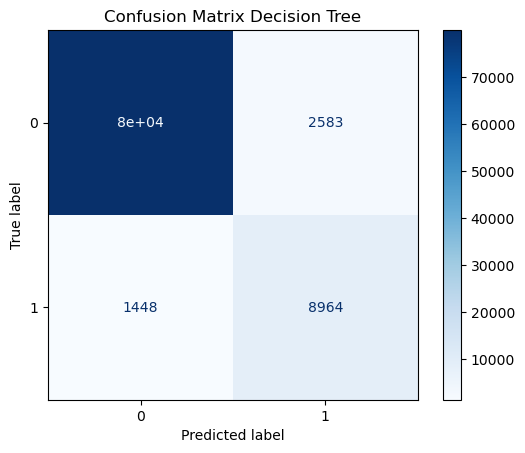

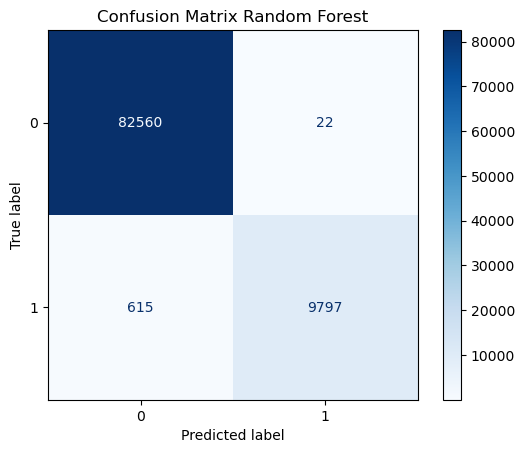

In [289]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix Decision Tree
cm_test = confusion_matrix(y_test, y_pred_dt)
cm_disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=dt.classes_)
cm_disp_test.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix Decision Tree')
plt.show()

# Confusion Matrix Decision Tree
cm_test_rf = confusion_matrix(y_test, y_pred_rf)
cm_disp_test_rf = ConfusionMatrixDisplay(confusion_matrix=cm_test_rf, display_labels=dt.classes_)
cm_disp_test_rf.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix Random Forest')
plt.show()

### Hyperparameter 80:20 balance dataset

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]

# Number of features to consider at every split
max_features = ['sqrt', 'log2']  # Ganti 'auto' dengan 'sqrt' atau 'log2'

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num=6)]

# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]